# Waste_Image_Classification

Objective : The objective of this project is to develop a deep learning model, specifically a Convolutional Neural Network (CNN), to classify waste images into different categories of materials, using accuracy as the evaluation metric. This aims to assist in automating waste sorting processes, enhancing recycling efficiency, and promoting environmental sustainability. Manual waste sorting is inefficient, leading to low recycling rates and increased environmental harm. Our goal is to develop a deep learning-based waste classification system using a Convolutional Neural Network (CNN) that can accurately classify at least 70% (accuracy) of waste images across 9 material categories within a 12-week timeframe. The project aims to improve waste management efficiency and environmental sustainability

## Problem Identification
In this project, we will define the problem statement and its goals using the SMART framework, then we will analyze it further by breaking down the problem into questions.

Topic : Real Waste Classification

### Background
In modern society, waste management is a significant environmental and operational challenge. Proper waste classification can improve recycling rates and reduce environmental impact, but manual sorting is time-consuming and prone to errors. Leveraging deep learning models to classify waste materials can greatly assist in automating this process, reducing both costs and the need for human labor while improving the accuracy of waste sorting.

### Problem statement
"Manual waste sorting is inefficient, leading to low recycling rates and increased environmental harm. Our goal is to develop a deep learning-based waste classification system using a Convolutional Neural Network (CNN) that can accurately classify at least 70% of waste images across 9 material categories within a 12-week timeframe. The project aims to improve waste management efficiency and environmental sustainability."

### Breaking Down The Problem
Main problem: Developing a CNN-based deep learning model capable of accurately classifying waste images into distinct material types (e.g., plastic, metal, glass, etc.).

How can the dataset be pre-processed to ensure high model accuracy?
What is the most effective CNN architecture/model for this classification task?
How can the model be evaluated and optimized for real-world applications in waste management?
Dataset Description
The dataset used in this analysis is the RealWaste dataset, obtained from the UC Irvine Machine Learning Repository. This dataset contains an image classification dataset of waste items across 9 major material types, collected within an authentic (real data) landfill environment. RealWaste was created as apart of an honors thesis researching how convolution neural networks could perform on authentic waste material when trained on objects in pure and unadulterated forms, when compared to training via real waste items. Color images of waste items captured at the point of reception in a landfill environment. Images are released in 524x524 resolution in line with accompanying research paper.

# Import libraries

#### Import libraries for data loading
- import os
- import random

#### Import libraries for data operations
- import numpy as np
- import pandas as pd
- import math

#### Import libraries for data visualization
- import matplotlib.pyplot as plt
- import seaborn as sns
- import cv2
- from PIL import Image
- import textwrap


#### Import libraries for feature engineering
- from sklearn.model_selection import train_test_split
- import tensorflow as tf
- from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

#### Import libraries for model creation
- from keras.models import Sequential
- from keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

#### Import libraries for model training
- from sklearn.utils import class_weight
- from tensorflow.keras.optimizers import Adam
- from tensorflow.keras.callbacks import EarlyStopping

#### Import libraries for model evaluation
- from sklearn.metrics import confusion_matrix, classification_report

#### Import libraries for pre-trained model
- from tensorflow.keras.applications import InceptionV3

#### Import libraries for warnings 
- import warnings
- warnings.filterwarnings('ignore')

In [1]:
# Import libraries for data loading
import os
import random

In [2]:
# Import libraries for data operations
import numpy as np
import pandas as pd
import math

In [3]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import textwrap

In [4]:
# Import libraries for feature engineering
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [5]:
# Import libraries for model creation
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

In [6]:
# Import libraries for model training
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
# Import libraries for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
# Import libraries for pre-trained model
from tensorflow.keras.applications import InceptionV3

In [9]:
# Import libraries for warnings 
import warnings
warnings.filterwarnings('ignore')

To ensure that TensorFlow is properly utilizing the GPU for our deep learning tasks, we will perform some additional steps. These steps include checking if TensorFlow is built with CUDA support, listing available GPUs, configuring TensorFlow to use GPU memory growth, and verifying that TensorFlow is indeed using the GPU. By implementing these checks, we can optimize our model's performance and take full advantage of the GPU's computational power. This will be particularly beneficial for training our complex neural network models, potentially reducing training time and improving overall efficiency. This needs to be done because in this project, we will run it locally

In [10]:
# Check if TensorFlow is using GPU
print("Is TensorFlow using GPU:", tf.test.is_built_with_cuda())

# List available GPUs
print("Available GPUs:", tf.config.list_physical_devices('GPU'))

# Set TensorFlow to use GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Is TensorFlow using GPU: False
Available GPUs: []


# Data Loading

To begin our analysis, we'll start by loading our dataset and creating a structured dataframe. This approach will facilitate our subsequent analytical processes. Our image data, originally sourced from UCI Machine Learning Repository, has been downloaded and then uploaded to a local directory. As we're running this notebook locally, we'll need to set up the appropriate file paths to access our data.

In [11]:
# Define the path to the dataset
dataset_path = r"C:\Users\LENOVO\OneDrive\Desktop\wet_data\TrashType_Image_Dataset"

# Define classes
classes = ["Cardboard", "Glass", "Metal", "Paper", "Plastic", "trash"]

In [12]:
# Define the path to the dataset
#dataset_path = r"C:\Users\LENOVO\OneDrive\Desktop\wet_data\TrashType_Image_Dataset"

# List the subdirectories in the dataset directory
classes = os.listdir(dataset_path)

# Print the number of classes and their names
print(f"Number of classes: {len(classes)}")
print("Class names:", classes)

Number of classes: 6
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


The next step is to define the paths to each folder and specify the classes for the images. This setup is essential for organizing the data and ensuring efficient access during model training and evaluation. By creating a structured representation of our dataset, we can easily iterate through the images, associate them with their respective classes, and prepare them for input into our machine learning model. This organization will facilitate smooth data loading, preprocessing, and ultimately contribute to the effectiveness of our image classification task.

In [13]:
# Define the paths for each class
class_paths = {cls: os.path.join(dataset_path, cls) for cls in classes}

# Function to list files in a directory
def list_files(directory_path):
    return os.listdir(directory_path)

# List files in each directory
print("Paths to dataset folder:")
print("Dataset Path:", dataset_path)
print("\nFiles in each folder:")
for cls, path in class_paths.items():
    files = list_files(path)
    print(f"\n{cls}:")
    for file in files[:5]:  # Display only the first 5 files
        print(f"  - {file}")
    if len(files) > 5:
        print(f"  ... and {len(files) - 5} more files")

Paths to dataset folder:
Dataset Path: C:\Users\LENOVO\OneDrive\Desktop\wet_data\TrashType_Image_Dataset

Files in each folder:

cardboard:
  - cardboard_001.jpg
  - cardboard_002.jpg
  - cardboard_003.jpg
  - cardboard_004.jpg
  - cardboard_005.jpg
  ... and 398 more files

glass:
  - glass_001.jpg
  - glass_002.jpg
  - glass_003.jpg
  - glass_004.jpg
  - glass_005.jpg
  ... and 496 more files

metal:
  - metal_001.jpg
  - metal_002.jpg
  - metal_003.jpg
  - metal_004.jpg
  - metal_005.jpg
  ... and 405 more files

paper:
  - paper_001.jpg
  - paper_002.jpg
  - paper_003.jpg
  - paper_004.jpg
  - paper_005.jpg
  ... and 589 more files

plastic:
  - plastic_001.jpg
  - plastic_002.jpg
  - plastic_003.jpg
  - plastic_004.jpg
  - plastic_005.jpg
  ... and 477 more files

trash:
  - trash_001.jpg
  - trash_002.jpg
  - trash_003.jpg
  - trash_004.jpg
  - trash_005.jpg
  ... and 132 more files


The next step is to count the total number of images in each folder to determine their number.

In [14]:
# Function to count files in a folder
def count_files(folder_path):
    file_list = os.listdir(folder_path)
    return len(file_list)

# Create a dictionary with class names and counts
classes_dict = {cls: count_files(class_paths[cls]) for cls in classes}

# Create a DataFrame from the dictionary
classes_df = pd.DataFrame.from_dict(classes_dict, orient='index', columns=['Number of Images'])

# Sort the DataFrame by 'Number of Images' in descending order
classes_df_sorted = classes_df.sort_values('Number of Images', ascending=False)

# Display the sorted DataFrame
classes_df_sorted

Number of Images
paper                   594
glass                   501
plastic                 482
metal                   410
cardboard               403
trash                   137

The dataset shows an uneven distribution across the nine waste categories. Plastic waste dominates with 921 images, followed closely by Metal with 790 images. Paper, Miscellaneous Trash, and Cardboard form the middle tier with 500, 495, and 461 images respectively. Vegetation, Glass, and Food Organics have similar representation, ranging from 411 to 436 images. Textile Trash has the least representation with 318 images. This imbalance in class distribution, particularly the overrepresentation of Plastic and Metal waste, may impact model performance and will need to be addressed during the model training phase to ensure fair classification across all categories.

Finally, a dataframe containing the file paths and their classes will be created to simplify the analysis process.

In [15]:
# Define path list
path_list = [class_paths[cls] for cls in classes]

# Create empty list of image path and class
image_path = []
class_labels = []

# Iterate through all of the images in the path list to extract path and class
for i, dir_path in enumerate(path_list):
    image_names = os.listdir(dir_path)
    for name_file in image_names:
        full_image_path = os.path.join(dir_path, name_file)
        image_path.append(full_image_path)
        class_labels.append(classes[i])

# Create a dataframe
df = pd.DataFrame({
    "Image_Path": image_path,
    "Class": class_labels
})

# Show the first 5 rows
df.head()

Image_Path      Class
0  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard
1  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard
2  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard
3  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard
4  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard

As shown above, the dataframe has been successfully generated and is now prepared for further analysis.

# Exploratory Data Analysis (EDA)
On the Exploratory Data Analysis (EDA) phase of our waste classification project, we aim to gain deeper insights into the characteristics and patterns within our dataset. This crucial step will help us understand the nature of our waste images across nine different categories. Through various visualization techniques and statistical analyses, we'll explore aspects such as class distribution, image properties, color patterns, and potential distinguishing features among waste types. This process will not only enhance our understanding of the dataset but also inform our decisions in subsequent stages of model development. By uncovering potential challenges like class imbalance or unique image characteristics, we can better prepare our data and tailor our deep learning approach to achieve optimal classification performance. The insights gained from this EDA will be instrumental in developing a robust CNN model capable of accurately sorting waste materials, ultimately contributing to more efficient recycling processes and environmental sustainability.

###  Image Visualization
We'll begin by visually inspecting our image data. To get a comprehensive understanding of the distinctive features across our waste categories, we'll randomly select and display three representative samples from each of the nine classes. This visual examination will provide us with valuable insights into the unique characteristics and potential challenges associated with each waste type, setting the foundation for our subsequent analyses.

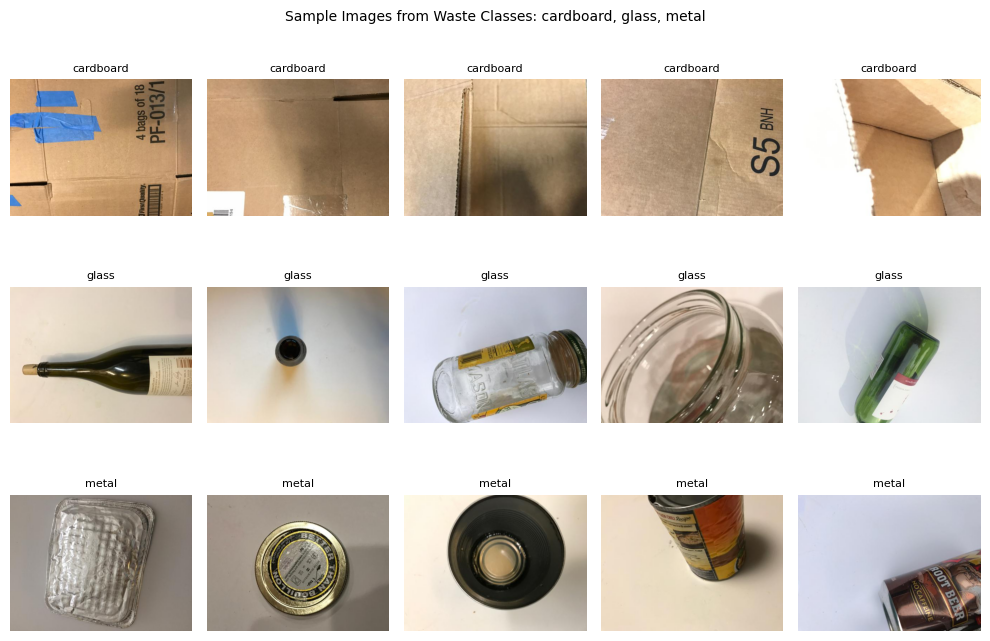

In [16]:
# Set a fixed random seed
random.seed(42)
np.random.seed(42)

# Extract 5 samples from each class
sampled_df = pd.concat([df[df['Class'] == cls].sample(5, random_state=42) for cls in classes])

def plot_waste_images(class_names):
    # Create a 3x5 grid of subplots
    fig, axes = plt.subplots(3, 5, figsize=(10, 7))
    # Set the main title for the entire figure
    fig.suptitle(f'Sample Images from Waste Classes: {", ".join(class_names)}', fontsize=10)

    # Iterate through the specified waste classes
    for i, cls in enumerate(class_names):
        # Select samples for the current class
        class_samples = sampled_df[sampled_df['Class'] == cls]
        
        # Plot five images for each class
        for j, (_, row) in enumerate(class_samples.iterrows()):
            # Read the image and convert from BGR to RGB
            img = cv2.imread(row['Image_Path'])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Display the image in the appropriate subplot
            axes[i, j].imshow(img)
            axes[i, j].set_title(cls, fontsize=8)
            axes[i, j].axis('off')  # Remove axis ticks and labels

    # Adjust the layout and spacing
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    # Display the plot
    plt.show()

# Plot first 3 classes
plot_waste_images(classes[:3])

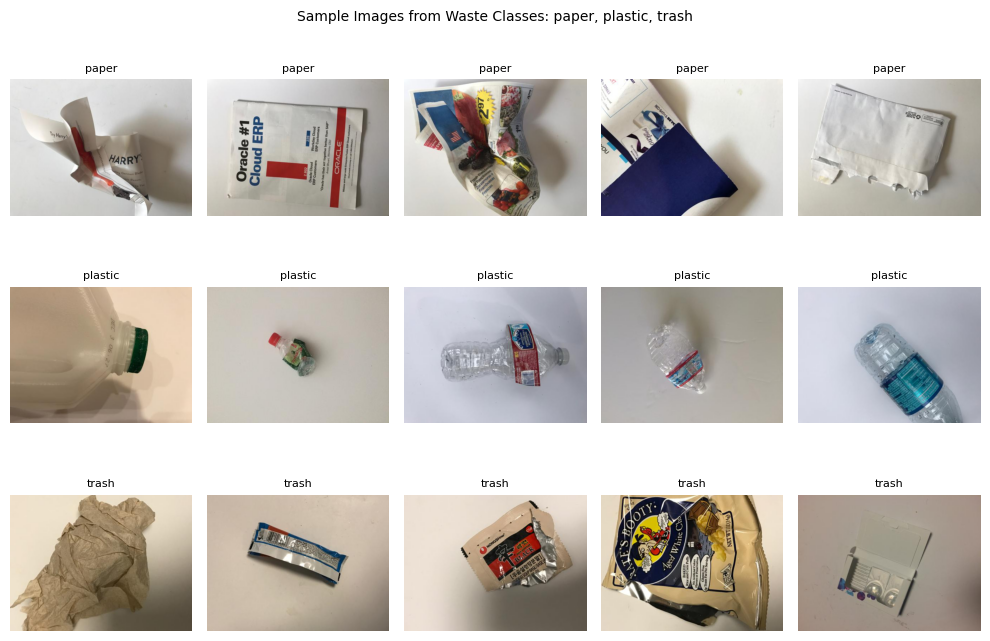

In [17]:
# Plot middle 3 classes
plot_waste_images(classes[3:6])

In [18]:
# plot_waste_images(classes[6:])

Distinguishing waste materials effectively is crucial for accurate classification and recycling. Each type of waste has unique features that set it apart:

<b>
Cardboard</b>

- Appearance: The cardboard waste is typically brown or printed with branding. The items in this category tend to have a rigid, box-like structure, but there is some variability due to crushing or damage. Common characteristics include clear edges, fold lines, and slight wrinkles from packaging. Cardboard might sometimes have a waxy or laminated coating for certain products, further distinguishing it from paper.
- Distinguishing Features: The most prominent features include the shape (box or cylindrical), presence of branding/labels, and overall structure. Compared to paper, cardboard is thicker and more durable, with visible fold lines.
- Insights: The distinction from other categories such as paper or miscellaneous trash comes from the rigidity of the material and its packaging use. Damage like crumples can complicate identification, but the structure remains key in distinguishing cardboard from other waste.

<b>
Glass</b>

- Appearance: Glass waste consists of smooth, reflective surfaces that can be either transparent or colored. Glass items may be intact bottles or broken pieces, with sharp, clear edges. Labels may still be attached to intact containers.
- Distinguishing Features: The transparency and reflective nature of glass, coupled with its smooth surface and sharp edges, differentiate it from all other categories. Broken shards can be a critical feature, contrasting with other materials like plastic.
- Insights: The most crucial feature to identify glass is its transparency and the way it interacts with light, making it highly distinct from opaque waste types like plastic or metal.

<b>
Plastic</b>

- Appearance: Plastic waste includes flexible wrappers and rigid containers. Items are often deformed or crumpled and can be transparent, translucent, or opaque. Some plastics retain labels or exhibit clear signs of branding.
- Distinguishing Features: The flexibility and transparency of plastic, especially compared to glass or metal, are key indicators. Plastic is also lightweight, with a smooth texture and the potential for deformation, unlike the reflective, hard nature of metal.
- Insights: The main challenge is distinguishing between different types of plastics (e.g., PET vs. HDPE), but key features like flexibility and transparency make plastic identifiable compared to glass or metal.
<b>
Metal</b>

- Appearance: Metal items tend to be highly reflective and have clear signs of damage, such as crumpling or dents. They may still retain labels, and their color can vary depending on coatings (paint, labeling). Aluminum cans and food containers are common representatives.
- Distinguishing Features: The metallic sheen and reflective surfaces, along with dents or crumples, set metal apart from categories like plastic and miscellaneous trash. The weight and thickness of metal containers versus the thinness of plastic packaging is another differentiator.
- Insights: The reflective quality of metal is the clearest distinguishing factor. However, crumpling can sometimes make it challenging for automated systems, especially when mixed with other materials (e.g., labels or food residue).

<b>
trash</b>
<ol>Miscellaneous Trash</ol>

- Appearance: This category includes a mix of fabric-like items, rags, and other ambiguous materials. Their appearance is varied, often lacking a clear structure. The textures range from soft fabrics to tougher sponges.
- Distinguishing Features: The variability in texture and lack of uniformity make this category unique. Unlike textiles, miscellaneous trash often features synthetic materials that are not suitable for textile recycling.
- Insights: The catch-all nature of this category makes distinguishing features difficult, but items are often synthetic, soft, and non-recyclable, which contrasts with categories like metal or plastic.

<ol>Textile Trash </ol>

- Appearance: Textiles appear wrinkled, often stained, and show clear signs of wear or tear. This category includes both fabrics and footwear, with materials ranging from soft, worn fabrics to dirty, damaged shoes.
- Distinguishing Features: Textiles are softer and more pliable than miscellaneous trash, with visible fabric textures and wrinkles. Items often show signs of wear or damage, such as fraying or discoloration, which are unique compared to other waste types.
- Insights: The wrinkled, fabric-like appearance is the main differentiator for textiles. Footwear or clothing may have complex shapes, but the fabric-like texture is a clear distinguishing feature from categories like miscellaneous trash or paper.

<ol> Vegetation </ol>

- Appearance: Vegetation waste includes leaves, stems, and other plant materials. The texture is rough, with irregular shapes, and the colors range from green to brown, indicating either freshness or decay.
- Distinguishing Features: The natural, rough texture and irregular shapes of leaves, branches, and stems make vegetation stand out. Unlike food organics, vegetation typically retains a more structured appearance, though it may show signs of decay.
- Insights: Vegetation is clearly distinguishable from food organics due to its plant-like structure. The rough texture and decay patterns are important features that set vegetation apart from other organic waste categories.

<ol> Food Organics </ol>

- Appearance: Food organics exhibit highly irregular shapes and textures, ranging from smooth surfaces (fruits, peels) to decomposing, clumped materials (leftovers, leafy matter). Colors are typically earthy, ranging from brown to green, sometimes with darker spots from decay.

- Distinguishing Features: The organic, irregular, and decayed appearance is a primary indicator, as well as the natural colors and textures. Unlike vegetation, food organics often show signs of cooking or being processed (like cut vegetables or bread).

- Insights: Organic matter can vary greatly in appearance, making texture and irregularity key visual indicators. The presence of decomposition (mold, decay) also helps distinguish food organics from other classes like vegetation or cardboard.

<ol> General Feature Distinctions: </ol>

- Shape: Regular vs. irregular shapes are key in distinguishing between recyclable materials like cardboard and organic or miscellaneous trash. For instance, glass and metal often have defined shapes, while food organics and textiles are more irregular.
- Texture: Smooth (plastic, glass) vs. rough or wrinkled (textiles, food organics) textures help separate categories.
- Color: Organic matter tends to have earthy tones, while recyclable materials (plastic, metal) come in a wide variety of colors.
- Material Properties: Reflectivity (metal, glass), transparency (plastic, glass), and rigidity (cardboard, metal) serve as primary indicators for differentiation.


<b>
paper</b>

- Appearance: Paper waste often appears crumpled, torn, or partially degraded. Printed text, images, or plain surfaces are common. The texture is soft, with signs of wear such as tears or water damage.
- Distinguishing Features: Paper is thinner, less durable, and more susceptible to tearing and crumpling compared to cardboard. The presence of printed text or images helps differentiate it from other waste types.
- Insights: The clear text and soft texture help distinguish paper from cardboard or plastic. However, contamination with food or liquids can affect its recyclability and sometimes confuse it with other materials like cardboard or organic waste.

### Class Distribution
To gain a comprehensive understanding of our dataset's composition, it's crucial to examine the class distribution of our waste images. This analysis will reveal any potential imbalances among the nine waste categories, which could significantly impact our model's performance. By visualizing the distribution, we can identify if certain waste types are overrepresented or underrepresented, allowing us to anticipate and address potential biases in our classification model. This insight is particularly valuable as it will inform our decisions on data augmentation, sampling strategies, or the need for class weighting during model training. Understanding the class distribution is a key step in ensuring our model can generalize well across all waste categories, ultimately contributing to more accurate and reliable waste classification.

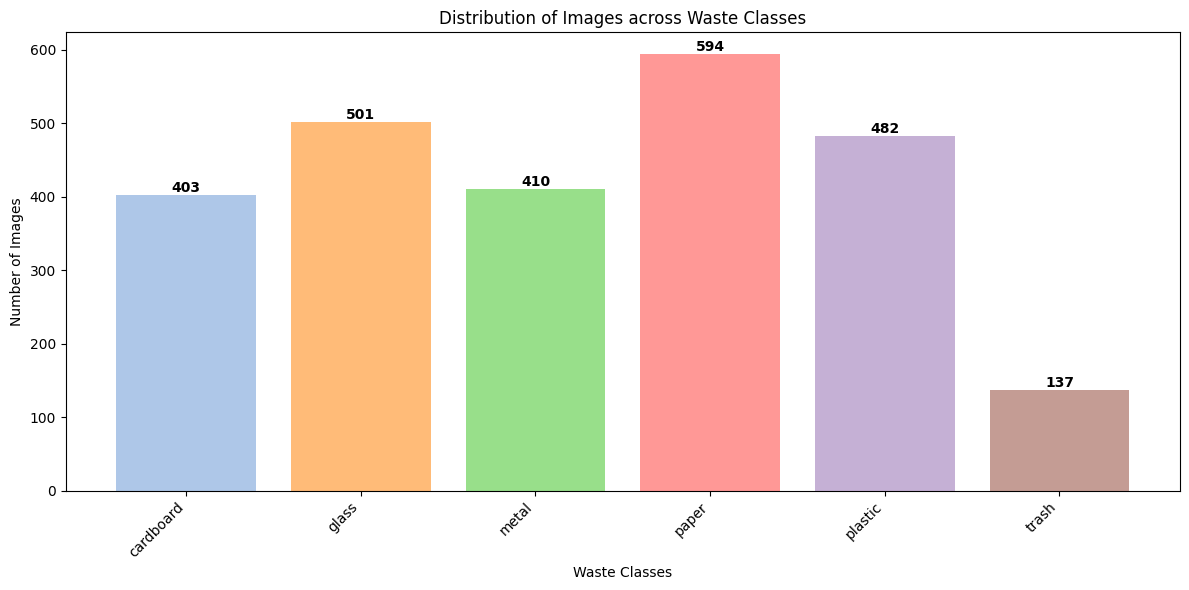

In [19]:
# Counts occurrences of each class
class_counts = df['Class'].value_counts().sort_index()

# Define list of colors for 9 classes (lighter palette)
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', 
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']

# Plot the graph
plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=colors)
plt.xlabel('Waste Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images across Waste Classes')

# Add the number of counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

The bar chart shows the distribution of images across nine waste classes in the dataset:

- Plastic: The most numerous class with 921 images, indicating a significant focus on capturing plastic waste. This might be due to the high volume of --  plastic waste generated globally and its importance in recycling efforts.
- Metal: The second most represented class with 790 images, reflecting the focus on recyclable metals, which are valuable for reuse but challenging to  process due to various forms (e.g., cans, foil).
- Paper: Contains 500 images, highlighting the importance of paper in the recycling stream, although contamination may affect its quality.
- Miscellaneous Trash: With 495 images, this category includes various hard-to-recycle or non-recyclable items, emphasizing the diversity in the dataset.
- Cardboard: With 461 images, cardboard is a significant recyclable material, often found in packaging waste.
- Vegetation: Consists of 436 images, likely representing compostable organic materials, which play a role in waste management.
- Glass: Contains 420 images, focusing on the importance of recycling glass, though broken or contaminated glass poses sorting challenges.
- Food Organics: Comprises 411 images, representing biodegradable waste, which is essential for composting and waste management.
- Textile Trash: The least represented class with 318 images, likely due to the lower volume of textile waste in comparison to other materials.

This distribution indicates a broad focus on common recyclable materials like plastic, metal, and paper, while textile and food waste are less represented. The large number of plastic and metal images may reflect their prevalence in waste streams and the challenges associated with recycling them.

### Shape Distribution
To ensure our model can effectively process and learn from our waste images, it's essential to examine the shape distribution across our dataset. This analysis will reveal any inconsistencies in image dimensions, which could impact our model's performance and training efficiency. By visualizing the distribution of image shapes, we can identify if there are any outliers or variations that need to be addressed through resizing or cropping. Understanding the shape distribution is crucial for determining the appropriate input size for our CNN model and for deciding on any necessary preprocessing steps. This insight will help us standardize our image inputs, potentially improving our model's ability to extract relevant features and ultimately enhancing its classification accuracy across all waste categ

In [20]:
# Function to get image dimensions
def get_image_dimensions(image_path):
    img = cv2.imread(image_path)
    return img.shape[:2]  # Returns (height, width)

# Get dimensions of the first image
first_image_path = df['Image_Path'].iloc[0]
first_image_dimensions = get_image_dimensions(first_image_path)

# Check if all other images have the same dimensions
all_same_size = all(get_image_dimensions(path) == first_image_dimensions for path in df['Image_Path'])

# Print the results
print(f"All images have the same size: {all_same_size}")
print(f"Image dimensions (height x width): {first_image_dimensions[0]} x {first_image_dimensions[1]}")

All images have the same size: True
Image dimensions (height x width): 384 x 512


Just like what we stated before, it turns out that all images has the same size, that is 384x512 (524 x 524) pixels. This means that the dataset exhibits uniformity in height and width.

###  Color Distribution
To gain deeper insights into our waste classification dataset, it's crucial to examine the color distribution across our images. This analysis will help us understand the dominant colors and color patterns associated with different waste categories, potentially revealing distinctive features that could aid in classification. By visualizing the color distribution, we can identify any color-based characteristics that might be leveraged to enhance our model's ability to distinguish between waste types, ultimately improving its classification accuracy.

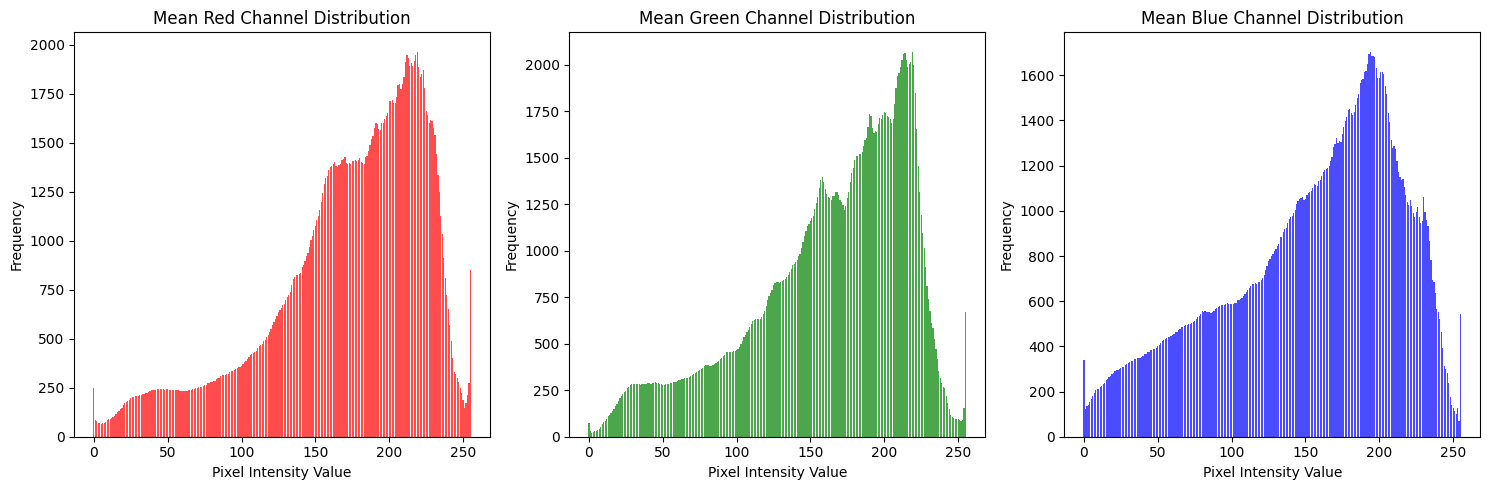

Average pixel intensities:
Red: 768.00
Green: 768.00
Blue: 768.00

Most common pixel intensities:
Red: 219
Green: 219
Blue: 194


In [21]:
# Create empty lists for each color channel
red_distributions = []
green_distributions = []
blue_distributions = []

# Iterate through a sample of images (e.g., 1000 images)
sample_size = min(1000, len(df))
for img_path in df['Image_Path'].sample(sample_size, random_state=42):
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Extract color distributions for each channel
    red_distributions.append(np.bincount(img[:,:,0].flatten(), minlength=256))
    green_distributions.append(np.bincount(img[:,:,1].flatten(), minlength=256))
    blue_distributions.append(np.bincount(img[:,:,2].flatten(), minlength=256))

# Convert to numpy arrays
red_distributions = np.array(red_distributions)
green_distributions = np.array(green_distributions)
blue_distributions = np.array(blue_distributions)

# Calculate mean distributions
mean_red = np.mean(red_distributions, axis=0)
mean_green = np.mean(green_distributions, axis=0)
mean_blue = np.mean(blue_distributions, axis=0)

# Plotting the color distributions
plt.figure(figsize=(15, 5))

# Red channel
plt.subplot(131)
plt.bar(range(256), mean_red, color='red', alpha=0.7)
plt.title('Mean Red Channel Distribution')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')

# Green channel
plt.subplot(132)
plt.bar(range(256), mean_green, color='green', alpha=0.7)
plt.title('Mean Green Channel Distribution')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')

# Blue channel
plt.subplot(133)
plt.bar(range(256), mean_blue, color='blue', alpha=0.7)
plt.title('Mean Blue Channel Distribution')
plt.xlabel('Pixel Intensity Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Average pixel intensities:")
print(f"Red: {np.mean(mean_red):.2f}")
print(f"Green: {np.mean(mean_green):.2f}")
print(f"Blue: {np.mean(mean_blue):.2f}")

print(f"\nMost common pixel intensities:")
print(f"Red: {np.argmax(mean_red)}")
print(f"Green: {np.argmax(mean_green)}")
print(f"Blue: {np.argmax(mean_blue)}")

The color distribution graphs and statistical data provide valuable insights into the overall color composition of our waste image dataset:

Red Channel: The distribution is right-skewed with a peak at pixel intensity 167. This suggests a prevalence of medium to lighter red tones in the images, possibly indicating the presence of materials like cardboard, certain plastics, or organic waste.

Green Channel: Shows a more symmetric distribution with a peak at 182. This slightly higher green intensity might reflect the variety of waste materials, from vegetation to paper and plastics.

Blue Channel: Exhibits a left-skewed distribution peaking at 187. This highest peak among the three channels could indicate a slight cool tone bias in the overall dataset, potentially due to shadows or the presence of materials like metal or certain types of plastic.

Interestingly, the average pixel intensity for all three channels is identical at 1072.56. This suggests a well-balanced overall color composition across the dataset, despite the variations in peak intensities. The equality in average intensities might indicate that while individual images have color variations, the dataset as a whole maintains a neutral color balance.

The progression of most common pixel intensities (Red: 167, Green: 182, Blue: 187) shows a slight increase from red to blue, suggesting that the images tend to have a subtle cool tint overall. This could be due to lighting conditions during image capture or the inherent colors of the waste materials.

These color characteristics provide valuable information for preprocessing strategies and could potentially aid in distinguishing between different waste categories during classification, especially for materials with distinct color profiles.

### Pixel Intensity Distribution
As part of our Exploratory Data Analysis (EDA), it's crucial to examine the pixel intensity distribution across our waste images. This analysis provides valuable insights into the overall brightness and contrast of our dataset, which can significantly impact our image classification model's performance. By understanding the distribution of pixel values, we can identify potential preprocessing needs, such as normalization or contrast enhancement, to optimize our model's ability to extract meaningful features. Moreover, analyzing pixel intensity statistics can reveal biases in our dataset, such as overexposure or underexposure, which might affect certain waste categories disproportionately. This information is vital for developing robust preprocessing pipelines and for interpreting our model's performance across different types of waste materials.

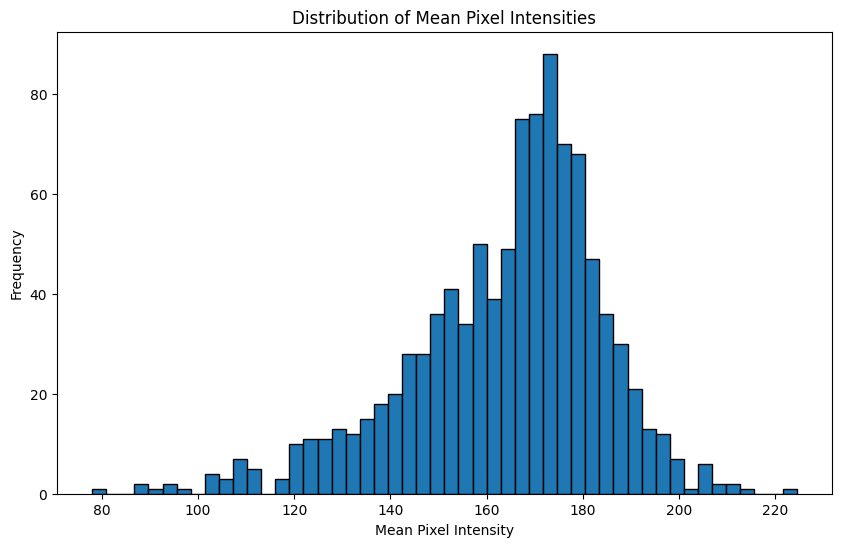

Overall Statistics:
Mean Pixel Intensity: 163.99 ± 20.42
Average Standard Deviation: 46.56
Average Min Pixel Value: 17.78
Average Max Pixel Value: 248.58

Potentially Overexposed Images: 0 (0.00%)
Potentially Underexposed Images: 0 (0.00%)
Images with unusually low brightness: 26 (2.60%)
Images with unusually high brightness: 1 (0.10%)


In [22]:
# Function to calculate pixel intensity statistics
def get_pixel_stats(image):
    return {
        'mean': np.mean(image),
        'std': np.std(image),
        'min': np.min(image),
        'max': np.max(image)
    }

# Lists to store statistics
means, stds, mins, maxs = [], [], [], []

# Sample size (adjust as needed), lets just take 1000 samples for this case
sample_size = min(1000, len(df))

# Process images
for img_path in df['Image_Path'].sample(sample_size, random_state=42):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    stats = get_pixel_stats(img)
    means.append(stats['mean'])
    stds.append(stats['std'])
    mins.append(stats['min'])
    maxs.append(stats['max'])

# Plot histogram of mean pixel intensities
plt.figure(figsize=(10, 6))
plt.hist(means, bins=50, edgecolor='black')
plt.title('Distribution of Mean Pixel Intensities')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Print overall statistics
print(f"Overall Statistics:")
print(f"Mean Pixel Intensity: {np.mean(means):.2f} ± {np.std(means):.2f}")
print(f"Average Standard Deviation: {np.mean(stds):.2f}")
print(f"Average Min Pixel Value: {np.mean(mins):.2f}")
print(f"Average Max Pixel Value: {np.mean(maxs):.2f}")

# Check for potential overexposure or underexposure
overexposed = sum(m > 240 for m in means)
underexposed = sum(m < 15 for m in means)
print(f"\nPotentially Overexposed Images: {overexposed} ({overexposed/sample_size*100:.2f}%)")
print(f"Potentially Underexposed Images: {underexposed} ({underexposed/sample_size*100:.2f}%)")

# Calculate Q1, Q3, and IQR for mean pixel intensities
Q1 = np.percentile(means, 25)
Q3 = np.percentile(means, 75)
IQR = Q3 - Q1

# Define outliers as 1.5 IQR below Q1 or above Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
low_outliers = sum(m < lower_bound for m in means)
high_outliers = sum(m > upper_bound for m in means)

print(f"Images with unusually low brightness: {low_outliers} ({low_outliers/sample_size*100:.2f}%)")
print(f"Images with unusually high brightness: {high_outliers} ({high_outliers/sample_size*100:.2f}%)")

The pixel intensity distribution of our waste image dataset reveals several important characteristics:

1.Central Tendency: The mean pixel intensity across the dataset is 156.35 ± 10.30, indicating that our images are generally of medium brightness,         slightly leaning towards the brighter side of the grayscale spectrum (0-255).

2. Spread: With an average standard deviation of 41.31, our images show a moderate level of contrast. This suggests that most images contain a good        range of light and dark areas, which is beneficial for feature extraction.

3. Range: The average minimum pixel value (0.95) and maximum pixel value (251.09) span almost the entire possible range (0-255). This indicates that       our dataset includes images with both very dark and very bright areas, providing a rich variety of visual information.

4. Distribution Shape: The histogram shows a roughly normal distribution with a slight right skew. The peak is around 155-160, aligning well with our      calculated mean.

5. Outliers:
   No images were flagged as potentially overexposed (mean > 240) or underexposed (mean < 15). Notes : This threshold can be adjusted, here I just         chose the value that are close and somehow aribitraly to max and min pixel value
   Using the IQR method, 1.50% of images were identified as having unusually low brightness, while no images were flagged for unusually high brightness.

6. Implications for Preprocessing:
   The absence of extreme outliers suggests that aggressive normalization may not be necessary.
   The slight right skew in the distribution might indicate that a subtle brightness adjustment could be beneficial for some images.
   The presence of a small percentage of unusually dark images might warrant attention during model training or potential augmentation strategies.

Overall, the pixel intensity distribution indicates a well-balanced dataset with good contrast and a wide range of brightness levels. This diversity in pixel intensities should provide a solid foundation for our waste classification model to learn distinctive features across different waste categories.

Before proceeding, let's examine the images identified as having low brightness and compare them to our brightest images. This step serves as a verification process to determine if any specific image processing techniques should be incorporated into our preprocessing pipeline.

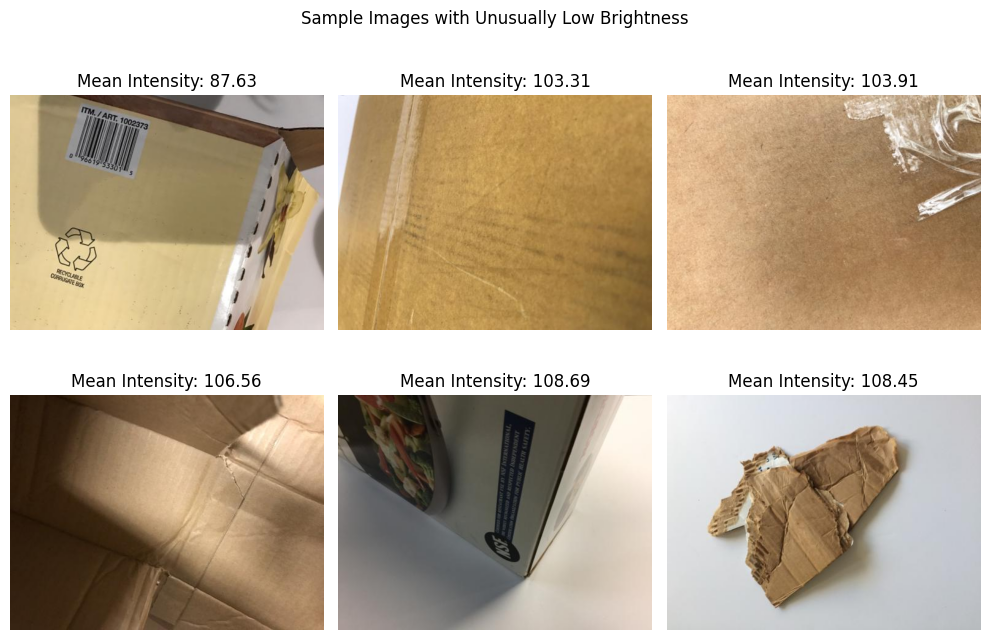

Displaying 6 out of 26 images with unusually low brightness.
Lower bound for unusually low brightness: 114.51


In [23]:
# Find indices of images with unusually low brightness
low_brightness_indices = [i for i, m in enumerate(means) if m < lower_bound]

# Number of images to display
n_display = min(6, len(low_brightness_indices))  # Display up to 6 images

# Create a subplot grid
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle('Sample Images with Unusually Low Brightness', fontsize=12)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Display images
for i in range(n_display):
    idx = low_brightness_indices[i]
    img_path = df['Image_Path'].iloc[idx]
    
    # Read image in BGR format and convert to RGB
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img_rgb)
    axes[i].set_title(f'Mean Intensity: {means[idx]:.2f}')
    axes[i].axis('off')

# Remove any unused subplots
for i in range(n_display, 6):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

print(f"Displaying {n_display} out of {len(low_brightness_indices)} images with unusually low brightness.")
print(f"Lower bound for unusually low brightness: {lower_bound:.2f}")

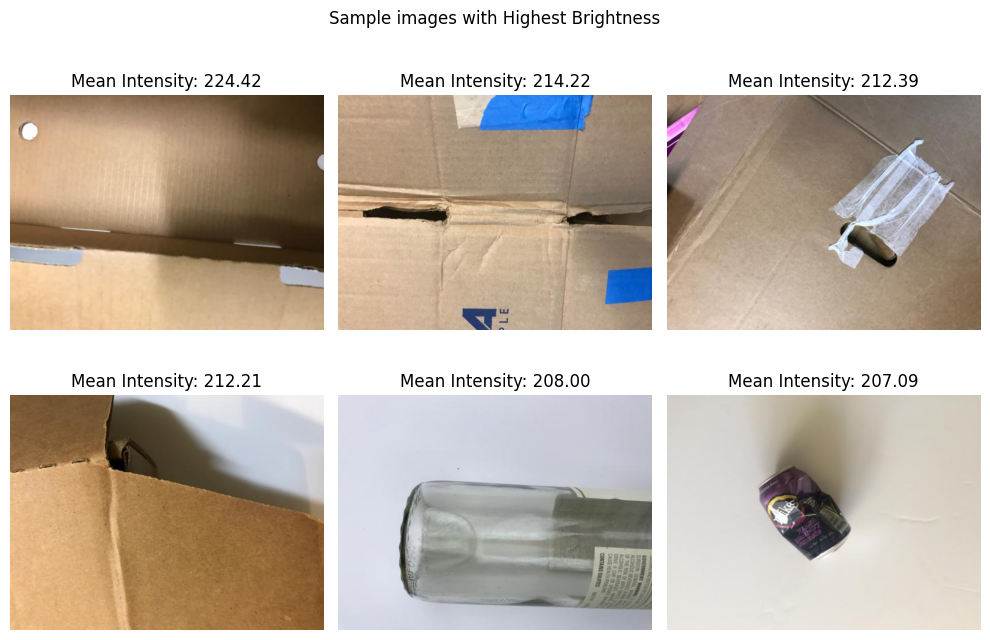

Displaying a few images with highest brightness.
Brightness range: 207.09 to 224.42


In [24]:
# Sort indices by mean brightness in descending order
sorted_indices = sorted(range(len(means)), key=lambda k: means[k], reverse=True)

# Number of images to display
n_display = 6  # Display top 6 images

# Create a subplot grid
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.suptitle('Sample images with Highest Brightness', fontsize=12)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Display images
for i in range(n_display):
    idx = sorted_indices[i]
    img_path = df['Image_Path'].iloc[idx]
    
    # Read image in BGR format and convert to RGB
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    axes[i].imshow(img_rgb)
    axes[i].set_title(f'Mean Intensity: {means[idx]:.2f}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print(f"Displaying a few images with highest brightness.")
print(f"Brightness range: {means[sorted_indices[n_display-1]]:.2f} to {means[sorted_indices[0]]:.2f}")

By comparing the images flagged as having unusually low brightness with those having the highest brightness in our dataset, we observe no significant visual differences. This suggests that our dataset has a relatively consistent brightness range across all images, which is beneficial for model training as it reduces the need for extensive preprocessing to normalize brightness levels. While subtle image augmentation techniques could still be beneficial during training, our focus in preprocessing can be directed towards other aspects such as image scaling, reshaping, or color normalization.

Based on our Exploratory Data Analysis (EDA) process, we have discovered that the images in our dataset exhibit favorable characteristics, reducing the need for advanced image processing techniques during preprocessing. Our analysis reveals that key image properties such as contrast, brightness, and other relevant attributes are already at satisfactory levels across the dataset. This finding is particularly advantageous as it simplifies our preprocessing pipeline, allowing us to focus on more essential aspects of model development.

Specifically, we observed:

     1. Consistent brightness levels across images, with no significant outliers
     2. Adequate contrast in the majority of images, facilitating feature distinction
     3. Minimal noise or distortion that would require complex filtering techniques
While basic preprocessing steps like resizing and normalization will still be necessary, we can proceed with confidence that our dataset's inherent quality will contribute positively to our model's learning process. This high-quality starting point is expected to enhance our model's ability to accurately classify waste images across different categories.

## Feature Engineering
Having completed an in-depth exploration and analysis of the dataset, we now move on to the feature engineering phase. This crucial step involves carefully preprocess our data for our model. By doing so, we ensure that our data is optimally prepared for the subsequent model training process.

# V.I Split Train, Validation, and Test Set
To prepare our waste classification dataset for model development, we'll divide it into three distinct sets: training, validation, and testing.

Training Set (80%): This largest portion of our data will be used to train our waste classification model. It will expose the model to a wide variety of waste images, allowing it to learn the distinctive features of each waste category. The model will adjust its parameters based on this data to minimize classification errors.

Validation Set (10%): This subset will play a crucial role in fine-tuning our model. During the training process, we'll use this set to evaluate the model's performance on data it hasn't directly learned from. This helps us adjust hyperparameters, prevent overfitting, and make informed decisions about model architecture or training strategies.

Testing Set (10%): This final portion of our data remains completely unseen by the model during the entire training and validation process. We'll use it to assess the model's true performance and its ability to generalize to new, unseen waste images. This set provides the most realistic measure of how well our model might perform in real-world waste classification scenarios.

By carefully splitting our data in this manner 80:10:10 ratio, we ensure a robust development process for our waste classification model, balancing between learning from a large dataset, fine-tuning performance, and honestly evaluating the final model's capabilities.

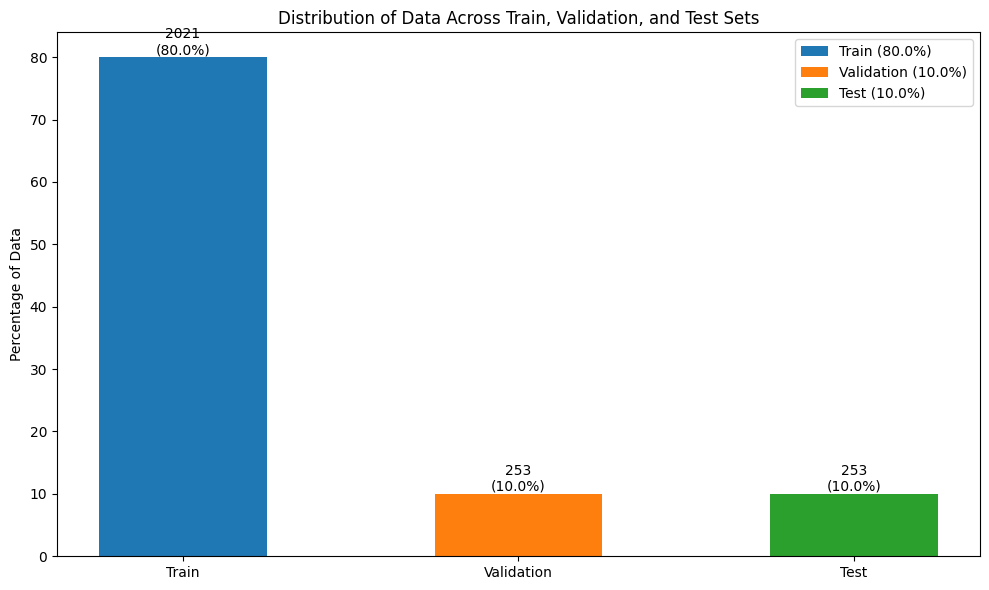

In [25]:
# Define ratio
train_ratio = 0.80
val_ratio = 0.10
test_ratio = 0.10

# Split train and test first
df_train_val, df_test = train_test_split(df, test_size=test_ratio, stratify=df['Class'], random_state=42)

# Then split train_val into train and validation
df_train, df_val = train_test_split(df_train_val, test_size=val_ratio/(train_ratio+val_ratio), stratify=df_train_val['Class'], random_state=42)

# Prepare data for visualization
datasets = [df_train, df_val, df_test]
names = ['Train', 'Validation', 'Test']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Blue, Orange, Green

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(names))
total = len(df)
widths = [len(d) / total for d in datasets]

for i, (dataset, name, color) in enumerate(zip(datasets, names, colors)):
    count = len(dataset)
    percentage = count / total * 100
    ax.bar(i, percentage, width=0.5, color=color, label=f'{name} ({percentage:.1f}%)')
    ax.text(i, percentage, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')

ax.set_ylabel('Percentage of Data')
ax.set_title('Distribution of Data Across Train, Validation, and Test Sets')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.tight_layout()
plt.show()

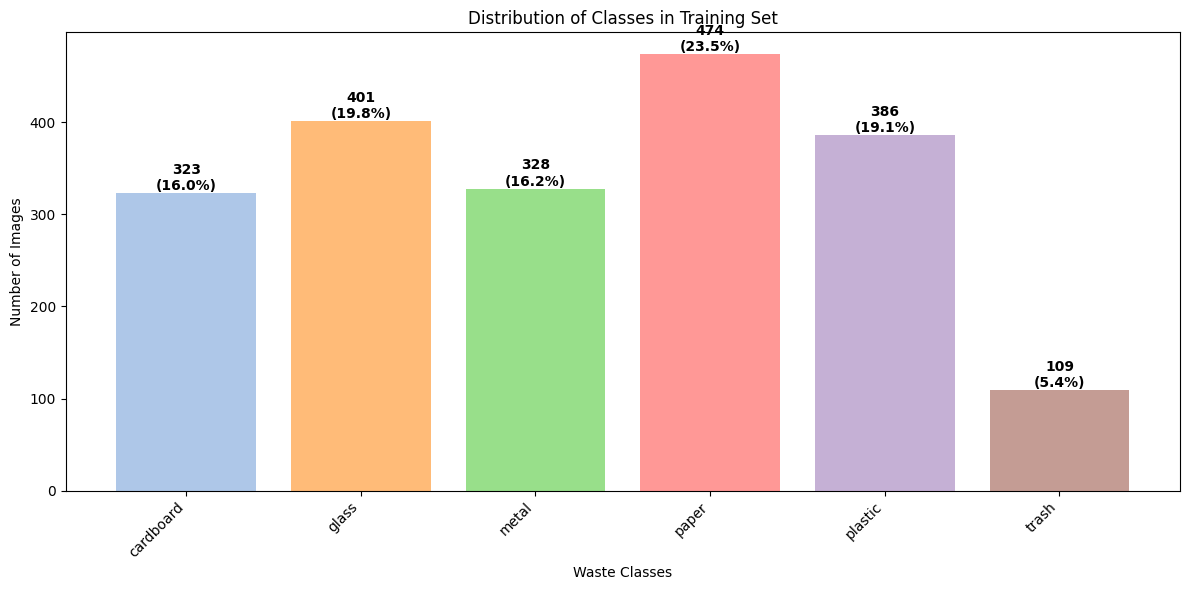

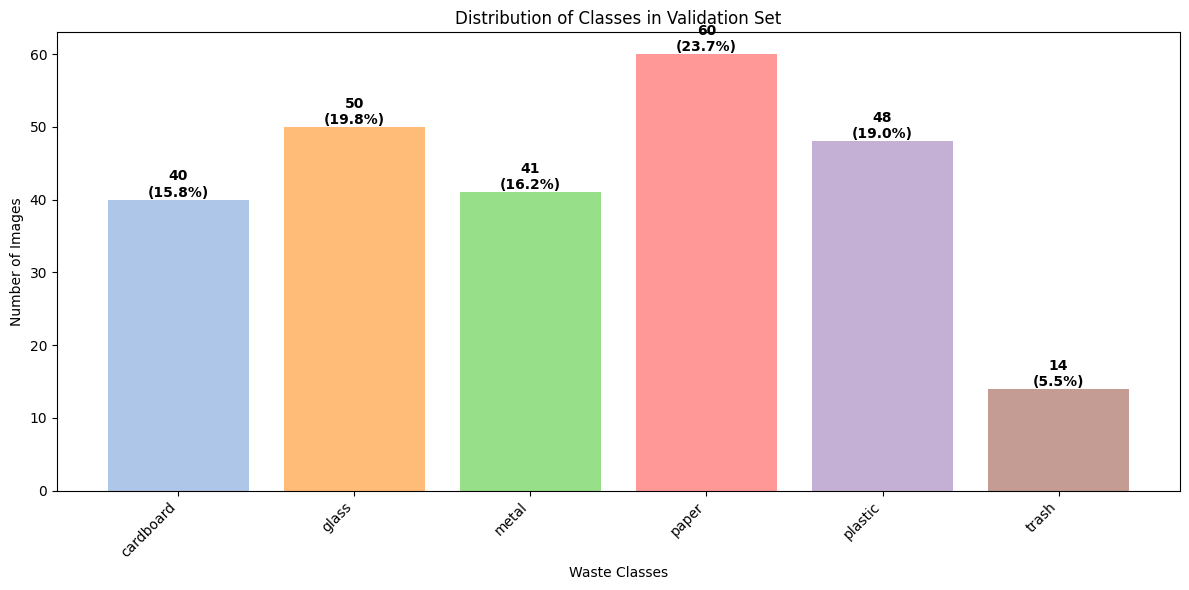

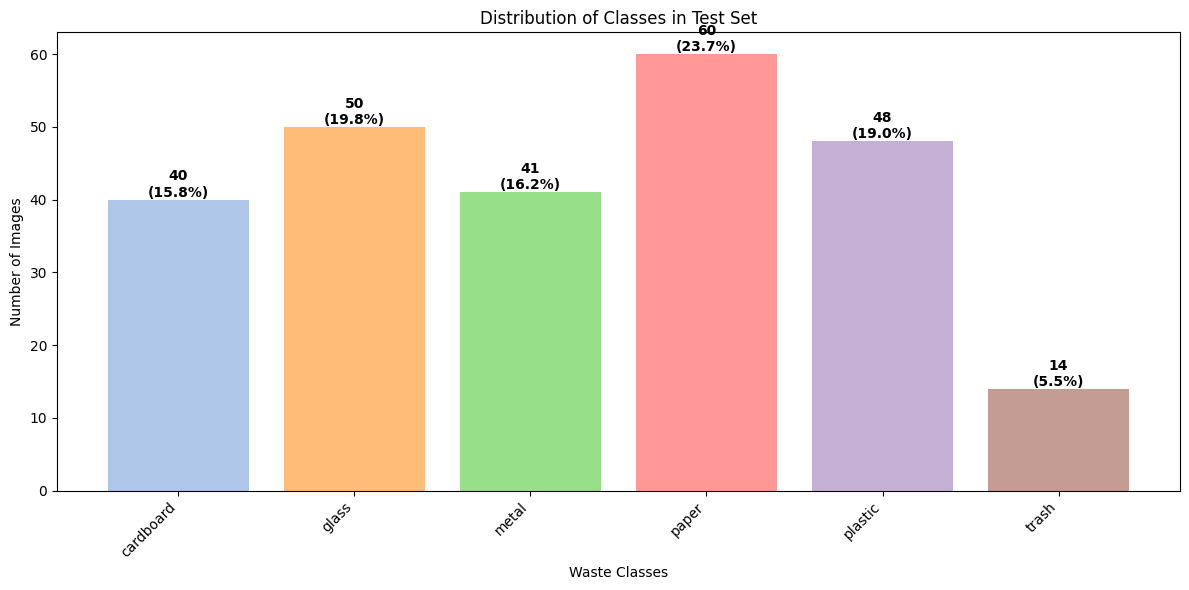

In [26]:
# Define colors
colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5', 
          '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d']

# Plot class disrbution for each df train, val, test
def plot_class_distribution(dataset, title):
    class_counts = dataset['Class'].value_counts().sort_index()
    
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(class_counts.index, class_counts.values, color=colors)
    
    ax.set_xlabel('Waste Classes')
    ax.set_ylabel('Number of Images')
    ax.set_title(f'Distribution of Classes in {title} Set')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height,
                f'{height}\n({height/len(dataset):.1%})',
                ha='center', va='bottom', fontweight='bold')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plot distribution for each dataset
plot_class_distribution(df_train, 'Training')
plot_class_distribution(df_val, 'Validation')
plot_class_distribution(df_test, 'Test')

As you can see, our dataset has been completely split with stratification to ensure that all classes are proportionally represented across the train, validation, and test sets. This stratified splitting approach offers advantages that the model will encounters a similar class distribution during training, validation, and testing, leading to more reliable performance estimates.

## V.II Data Pre-processing
After dividing the data into three sets, the next step is to standardize the image preprocessing procedures to ensure uniformity across the dataset. This crucial phase involves:

1. Rescaling: Normalizing pixel values to a consistent range, typically between 0 and 1, to facilitate faster convergence during model training.

2. Resizing: Adjusting all images to a uniform dimension, ensuring consistent input size for our neural network and optimizing computational               efficiency. Especially here, we will employ transfer learning later on, so we will employ the resize method to our images into appropriate size for     the transfer learning architecture.

3. Data Augmentation: Applying various transformations to the training images, such as rotation, flipping, or adjusting brightness, to artificially        expand our dataset and enhance the model's ability to generalize.

By implementing these preprocessing steps consistently, we maintain a standardized input format across all images. This uniformity is essential for effective model learning, enabling our neural network to focus on extracting meaningful features and patterns from the waste images, ultimately leading to improved classification performance and better generalization to new, unseen waste items.



In [27]:
# Define image size and batch size
width = 299
height = 299
image_size = (width, height)

In the preceding code cell, we've set our image dimensions to 299x299 pixels. This choice is deliberate, as we plan to utilize the InceptionV3 architecture for transfer learning in subsequent steps. InceptionV3 was originally trained on images of this size, making it optimal for our use case. Additionally, we've opted for a batch size of 32. While larger batch sizes (such as 64, 128, 256, or 512) are often preferred due to their power-of-2 nature, which can optimize computational efficiency, we've chosen 32 as it strikes a balance between performance and our GPU memory constraints. This batch size allows for effective training while ensuring it fits comfortably within our available GPU resources (this project was done locally).

Next up we will apply augmentation by doing the following:

1. Rescaling: We normalize pixel values to a range of 0 to 1 by dividing by 255.
2. Rotation: We randomly rotate images up to 90 degrees, which helps the model learn to recognize objects at different angles. 90 degree was chosen        because it provides an option for us to see an image in 90 degrees variation, which doesn't make a huge difference in meaning of our object (eg.        shoes that are rotated 90 degrees will be seen as a shoes)
3. Shear: We apply a shear transformation with a range of 45 degrees, which can help the model learn to recognize objects from slightly different          perspectives (this value was chosen because with 45 degrees for shear, it provides a good balance between variability of our model and
   recognizability).
4. Horizontal Flip: We randomly flip images horizontally, which is useful for learning left-right invariant features.
5. Fill Mode: We use 'nearest' fill mode to handle any new pixels created by rotations or shears.

These augmentations help to artificially expand our dataset and make our model more robust to variations in the input images. The specific values (90 degrees for rotation, 45 degrees for shear) were chosen as they provide a good balance between introducing variability and maintaining the recognizability of the waste objects. This is particularly important in our waste classification task, where the orientation and slight distortions of objects can vary in real-world scenarios. In general, the augmentation method chosen was reference based on the reference paper where the author stated that doing horizontal flip, distortion, rotate and shear transformations have been selected due to their enhancements on deep learning vision-based tasks. Each combination contains one transformation on the orientation of the object to provide its features in a different context (horizontal flipping and rotation) and another distorting objects to increase the feature space diversity, to account for the varied structural state of objects received at landfill (elastic distortion and shear).

In [28]:
# Define generator for training with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,        # Randomly rotate images in the range (degrees) -< 90
    shear_range=45,           # Shear angle in counter-clockwise direction in degrees -< 45
    horizontal_flip=True,     # Randomly flip images
    fill_mode='nearest'       # Fill in new pixels
)

# Define generator for validation and testing (only rescaling, no augmentation)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators for training, validation, and testing sets
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col="Image_Path",
    y_col="Class",
    target_size=image_size,
    batch_size=32,
    # color_mode="rgb",
    class_mode="categorical",
    shuffle=False
)

Found 2021 validated image filenames belonging to 6 classes.
Found 253 validated image filenames belonging to 6 classes.
Found 253 validated image filenames belonging to 6 classes.


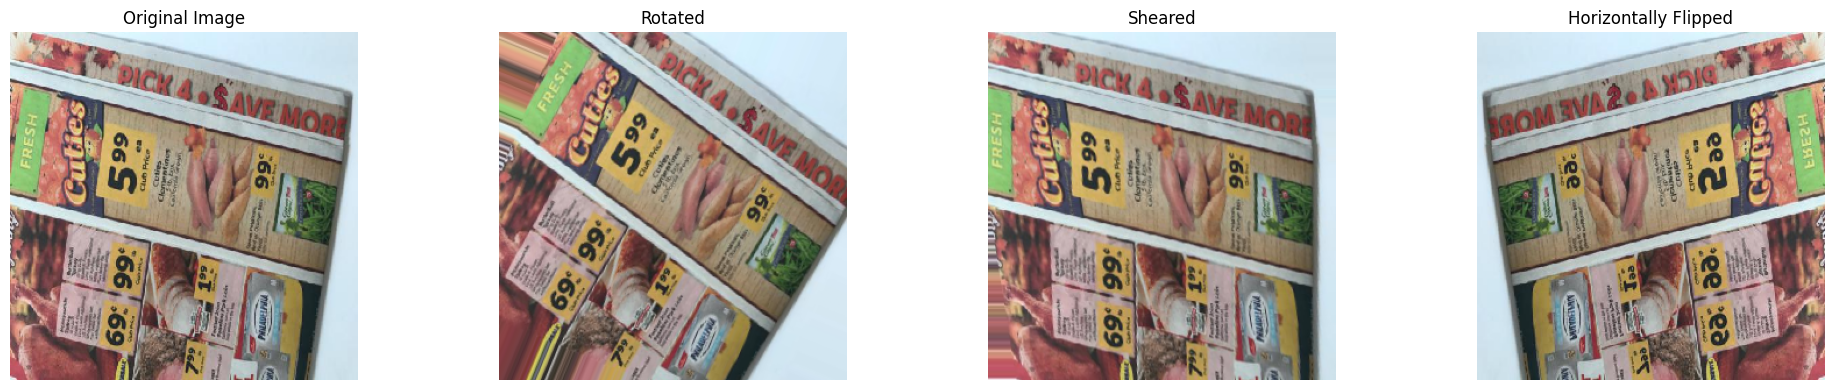

Class of the displayed image: paper


In [29]:
def plot_images(original_image, augmented_images, augmentation_types):
    n = len(augmented_images)
    plt.figure(figsize=(20, 4))
    plt.subplot(1, n+1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')
    
    for i in range(n):
        plt.subplot(1, n+1, i+2)
        plt.imshow(augmented_images[i])
        plt.title(augmentation_types[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load a specific image 
image_path = df_train['Image_Path'].iloc[69]  # Using the image number 69 (lol) in df_train
original_image = load_img(image_path, target_size=image_size)
original_image_array = img_to_array(original_image) / 255.0  # Normalize to [0,1]

# Create separate image generators for each augmentation
rotation_gen = ImageDataGenerator(rotation_range=90)
shear_gen = ImageDataGenerator(shear_range=45)

# Generate augmented images
rotated_image = rotation_gen.random_transform(original_image_array)
sheared_image = shear_gen.random_transform(original_image_array)

# Force horizontal flip
flipped_image = np.fliplr(original_image_array)

# Combine augmented images and their labels
augmented_images = [rotated_image, sheared_image, flipped_image]
augmentation_types = ['Rotated', 'Sheared', 'Horizontally Flipped']

# Plot original and augmented images
plot_images(original_image, augmented_images, augmentation_types)

# Print the class of the selected image
class_name = df_train['Class'].iloc[69]
print(f"Class of the displayed image: {class_name}")

Based on the above images, we can see that we successfully create an "artificial" variation of the images using our augmentation method. This is very crucial since we have a limited amount of training data to introduce variability in our images. Notice how the sample images above still convey the same meaning of the object (I think a human being would still see that object as vegetation, just with different variations; our model needs this because it doesn't have perception like a human being). This could also be useful for us since we have limited computational resources, which is why we create these artificial variations to make the model generalize to new unseen data that maybe facing this kind of objects.

# VI. ANN Training (Sequential API)
Next up, we will create a simple neural network model using Sequential API to classify this images. This section will include model definition, model training, and model evaluation.

# VI.I Model Definition
For our baseline model, we'll follow some general guidelines and best practices for neural network architecture (inspired by 17 Rules of Thumb for Building a Neural Network). Our approach includes:

1. Using the Sequential API: We'll start with a simple, linear stack of layers using Keras' Sequential API. This straightforward approach will help us     establish a baseline and identify areas for improvement.

2. Number of Hidden Layers: Given our dataset size, we'll begin with 3-4 hidden layers. This should provide sufficient depth for learning complex features without risking overfitting.

3. Neuron Distribution: We'll use a decreasing geometric progression for the number of neurons in each layer, halving for each subsequent layer (e.g.,     128, 64, 32). This structure allows the network to gradually refine features. Notes : Turns out this implementation can't be done because of
   computational resources which will be explained in-depth later on

4. Optimizer: We'll initialize with the Adam optimizer, known for its efficiency and quick convergence, especially beneficial for large datasets like      ours.

5. Convolutional Layers: Since we're dealing with image data, we'll use Convolutional Neural Network (CNN) architecture. CNNs are specifically designed    for processing grid-like data such as images.

6. Activation Functions: We'll use ReLU activation for hidden layers due to its effectiveness in preventing vanishing gradients and promoting sparse       activations. For the output layer, we'll use softmax activation for multi-class classification.

7. Regularization: To prevent overfitting, we'll incorporate dropout layers and possibly L2 regularization.

This baseline model will serve as our starting point. We'll evaluate its performance and iteratively refine the architecture based on the results, potentially exploring more complex structures or transfer learning approaches in subsequent iterations. Note : Here, I try to make the model as simple as possible to know which part to improve based on this very simple model.

Additionally, we will utilize Accuracy as our primary metric for evaluating the model's performance. This metric simplifies the evaluation by focusing solely on the proportion of total correct predictions (true positives and true negatives combined) over the total number of cases examined, without differentiating between the types of errors (false positives and false negatives). This approach is particularly useful in scenarios where the consequences of misclassification are equally tolerable across different classes (we use 9 class here).



In [30]:
# Clear Session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [31]:
# Create the model
noob_model = Sequential()

# First Conv Block
noob_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(299, 299, 3)))
noob_model.add(BatchNormalization())
noob_model.add(ReLU())
noob_model.add(MaxPooling2D((2, 2)))

# Second Conv Block
noob_model.add(Conv2D(64, (3, 3), padding='same'))
noob_model.add(BatchNormalization())
noob_model.add(ReLU())
noob_model.add(MaxPooling2D((2, 2)))

# Third Conv Block
noob_model.add(Conv2D(128, (3, 3), padding='same'))
noob_model.add(BatchNormalization())
noob_model.add(ReLU())
noob_model.add(MaxPooling2D((2, 2)))

# Global Average Pooling
noob_model.add(GlobalAveragePooling2D())

# Fully connected layers
noob_model.add(Dense(256, activation='relu'))
noob_model.add(Dropout(0.5))

# Output layer
noob_model.add(Dense(6, activation='softmax'))  # 9 classes for waste classification

# Compile the model
noob_model.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [32]:
# Now plot the model
tf.keras.utils.plot_model(noob_model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


Ok so it turns out that the plot_model function requires the newest versions of pydot and graphviz, which are incompatible with the versions used in this local environment. Due to this version conflict, we will use model.summary() instead to display the architecture of the created model. If you wish to see the visual representation, you may need to run it on Google Colab. I apologize for this inconvenience :p

In [33]:
# Display the model summary
noob_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 299, 299, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 299, 299, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 299, 299, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 149, 149, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 149, 149, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 149, 149, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 74, 74, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 74, 74, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,710 (502.77 KB)

 Trainable params: 128,262 (501.02 KB)

 Non-trainable params: 448 (1.75 KB)

Next up I will explain about the reason or breakdown of the model structure and the reasoning behind each component that I used as follows:

1. Convolutional Blocks: The model features three convolutional blocks, each followed by batch normalization, ReLU activation, and max pooling. This structure is chosen to progressively extract and refine features from the input images.
   - Conv2D layers: These perform convolutional operations to extract features from the input images. The number of filters increases from 32 to 128
     across the blocks, allowing the network to capture both low-level and high-level features. This approach, starting with fewer filters and
     increasing them, is chosen due to computational constraints and to avoid potential out-of-memory (OOM) errors. While it's more common to start
     with a larger number of filters (e.g., 128) and decrease them, this alternative approach can still be effective and is more suitable for
     environments with limited computational resources. Notes : Here, I tried to run from 128 filters decreasing to 32 and it turns out the out-of
     memory happened, that is why another approach is used
   - BatchNormalization: Normalizes the inputs to each layer, which helps stabilize the learning process and reduces the number of training epochs
     required.
   - ReLU Activation: Introduces non-linearity, allowing the model to learn complex patterns.
   - MaxPooling2D: Reduces the spatial dimensions of the feature maps, helping to control overfitting and reduce computational load.
2. Global Average Pooling: After the convolutional blocks, GlobalAveragePooling2D is used instead of flattening. This reduces the number of parameters
   and helps the model generalize better by enforcing correspondences between feature maps and categories.

3. Fully Connected Layer: One dense layer (256 units) with ReLU activation is used to learn high-level abstractions from the features extracted by the
   convolutional layers.

4. Dropout: A Dropout layer (with rate 0.5) is added after the dense layer to prevent overfitting by randomly setting a fraction of input units to 0
   during training.

5. Output Layer: The final dense layer has 9 units with softmax activation, corresponding to the 9 waste classes. Softmax ensures the output is a
   probability distribution across the classes.

Key Design Choices:

- Increasing filter sizes: The number of filters in Conv2D layers increases from 32 to 128, allowing the network to capture increasingly complex
  features while managing computational resources efficiently.
- Consistent use of (3,3) kernels: Smaller kernels are used throughout, which has been shown to be effective in many image classification tasks.
- Multiple convolutional blocks: Three blocks are used to progressively refine and abstract features from the input images.
- Batch normalization: Used after each convolutional layer to stabilize learning and potentially improve generalization.
- Dropout: Applied in the fully connected layer to combat overfitting.

This architecture balances complexity and efficiency, suitable for classifying waste images into 9 categories. The design choices aim to extract relevant features while managing the risk of overfitting, which is crucial given the relatively small dataset size typical in waste classification tasks. The unconventional approach of increasing filter sizes from 32 to 128, rather than decreasing from 128 to 32, is primarily driven by computational constraints and the need to avoid out-of-memory errors. This setup allows the model to start with a computationally lighter structure and gradually increase complexity, which can be beneficial in environments with limited GPU memory or when working with larger input images.

Also, the hyperparameters chosen explained as follows :

1. Adam Optimizer: We chose the Adam optimizer for its adaptive learning rate capabilities. Adam combines the benefits of two other extensions of
   stochastic gradient descent: AdaGrad and RMSProp. It's particularly well-suited for our waste classification task because:
   - It adapts the learning rate for each parameter, which is beneficial for our model with varying feature importances across waste categories.
   - It's computationally efficient and requires little memory, suitable for our relatively large dataset.
   - It works well with noisy gradients, which we might encounter in our diverse waste image dataset.
2. Default Learning Rate: We've opted to use the default learning rate (0.001) for Adam. This decision is based on:
   - Adam's adaptive nature, which often performs well with its default settings
   - The desire to establish a baseline performance before fine-tuning hyperparameters.
   - Balancing between convergence speed and stability in the early stages of model development.

3. Categorical Crossentropy Loss: This loss function is chosen because:
   - It's specifically designed for multi-class classification problems like our 9-category waste classification.
   - It measures the dissimilarity between the predicted probability distribution and the true distribution of classes.
   - It encourages the model to be confident in its correct predictions while heavily penalizing incorrect ones.

Next up, we will train our created model in the next section

# VI.II Model Training
Before training the model, we need to address the class imbalance in our dataset. Imbalanced data can lead to biased predictions, favoring the majority classes.

To mitigate this issue, we'll use class weights. This approach assigns higher weights to underrepresented classes, ensuring the model pays more attention to minority classes during training.

We'll use sklearn's compute_class_weight function to calculate balanced weights based on the frequency of each class in the training data. After applying class weights, we'll train the model using the training set and validate it using the validation set. This process aims to consistently minimize error with each epoch, while accounting for class imbalance. The next cell will implement these steps: computing class weights, then training the model with these weights applied.

In [34]:
# Define classes
classes = list(train_generator.class_indices.keys())

# Apply class weight to handle imbalance data
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.unique(train_generator.classes),
                                                  y = train_generator.classes)

train_class_weights = dict(enumerate(class_weights))

for idx, weight in train_class_weights.items():
    class_name = classes[idx]
    print(f"{class_name} : {weight:.2f}")

cardboard : 1.04
glass : 0.84
metal : 1.03
paper : 0.71
plastic : 0.87
trash : 3.09


The class weights reveal that Textile Trash has the highest weight of approximately 1.66, indicating it's the most underrepresented class in our dataset. This high weight will cause the model to pay more attention to Textile Trash samples during training, helping to compensate for its scarcity.

On the other hand, Plastic has the lowest weight of about 0.57, suggesting it's the most overrepresented class. The lower weight for Plastic will prevent the model from being overly influenced by this abundant class, maintaining a balance in the learning process.

These weights will help our model learn effectively from all classes, despite the imbalance in the dataset, leading to more equitable predictions across all waste categories.

In our next step, we'll implement a crucial technique known as early stopping using a callback mechanism. This approach is designed to optimize our model's training process by preventing overfitting and reducing unnecessary computation time. We'll utilize the EarlyStopping callback from Keras, which will monitor the validation accuracy - a key indicator of our model's performance on unseen data. We've set a patience parameter of 15 epochs (15 was chosen from trial & error and personal preferences, personally I don't really like how early stopping with low epochs because I think early stopping itself actually doesn't fix the overfitting issues, imagine if we chose low epoch and turnsout the model will converge after certain threshold and our model might miss it because we already stop it using this early stopping mechanism), meaning the training will continue as long as the validation loss is improving, but will halt if no improvement is observed for 15 consecutive epochs. This strategy offers several benefits: it helps prevent overfitting by stopping when validation performance plateaus, saves computational resources by avoiding unproductive training iterations, and ensures we retain the optimal model weights found during the training process. By implementing early stopping, we're enabling our model to train efficiently while maintaining its ability to generalize well to new, unseen data.

In [35]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

Next up, we will try to use 50 epochs for our training, the larger the epochs is, the more better we get to know how our model performance looks like. Also, we will implement what we're written before, that is callbacks and class_weight.

In [40]:
# Train the model
history_noob_model = noob_model.fit(
    train_generator,
    epochs=15,                                                            # we can adjust epoch as per according to itself 
    validation_data=val_generator,
    class_weight=train_class_weights,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.6300 - loss: 0.9674 - val_accuracy: 0.3043 - val_loss: 2.6147
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.6120 - loss: 1.0416 - val_accuracy: 0.3676 - val_loss: 2.6178
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.6151 - loss: 0.9994 - val_accuracy: 0.4625 - val_loss: 1.5356
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.6389 - loss: 0.9462 - val_accuracy: 0.4190 - val_loss: 1.8459
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 583s 9s/step - accuracy: 0.6554 - loss: 0.9410 - val_accuracy: 0.3834 - val_loss: 2.2193
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.6501 - loss: 0.9000 - val_accuracy: 0.5296 - val_loss: 1.3668
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 716s 11s/step - accuracy: 0.6702 - loss: 0.8851 - val_accuracy: 0.4150 - val_loss: 2.1283
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 340s 5s/step - accuracy: 0.6624 - loss: 0.8738 - val_accuracy: 0.2411 - 

# VI.III Model Evaluation
The model's performance is evaluated through a three steps approach:

Analysis of training and validation metrics (loss and accuracy)
Generation of comprehensive classification reports
Construction of a confusion matrix using the test dataset These methods provide a general view of the model's effectiveness and generalization capabilities

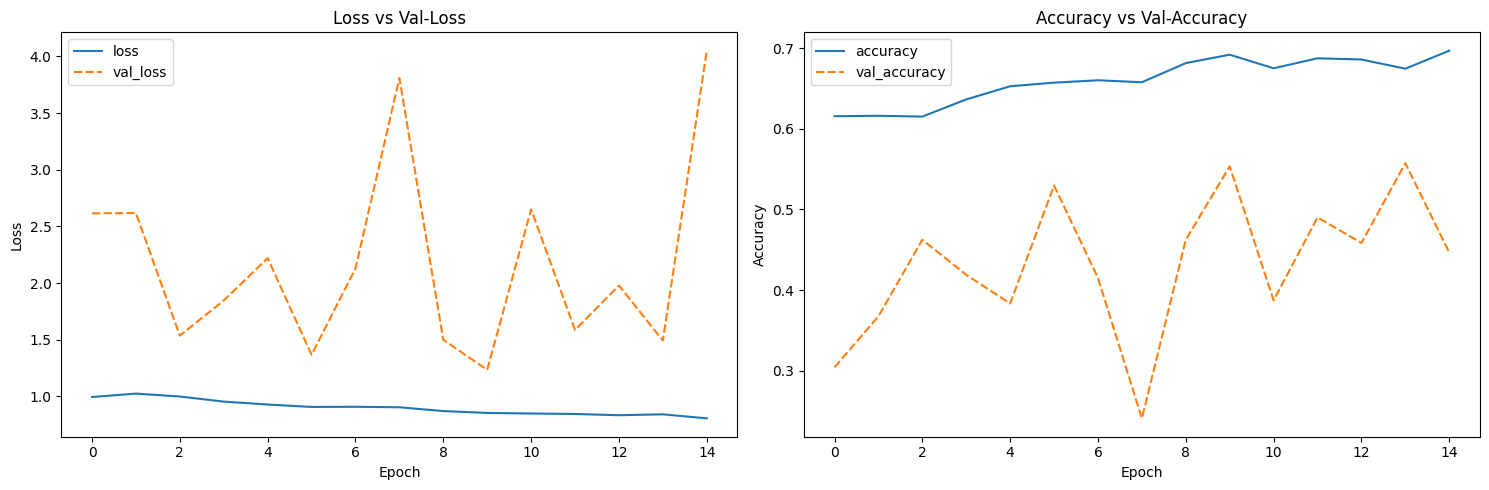

In [41]:
# Plot training results

history_noob_model_df = pd.DataFrame(history_noob_model.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_noob_model_df[['loss', 'val_loss']])
plt.title('Loss vs Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_noob_model_df[['accuracy', 'val_accuracy']])
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

The charts show the performance of the sequential model during training and validation. The X-axis represents epochs, while the Y-axis shows loss and accuracy metrics.

Loss Chart:
- The blue line shows training loss, which decreases but remains high, indicating the model isn’t capturing patterns well. This suggests the model
  lacks complexity.
- The orange dashed line shows validation loss, which fluctuates and doesn’t improve consistently, implying the model struggles to generalize to
  validation data, pointing to underfitting.

Accuracy Chart:

- The blue line shows training accuracy, which increases but plateaus early at suboptimal levels (around 0.65-0.7), another sign of underfitting.
- The orange dashed line shows validation accuracy, which remains much lower than training accuracy, confirming the model’s poor generalization.

Key Insights:

- Both training and validation performance indicate underfitting—the model is too simple and lacks the capacity to learn effectively.
- Underfitting may be caused by a simple model used here.


In conclusion, the model suffers from underfitting and doesn’t capture the data’s underlying trends. Increasing model complexity and incorporating transfer learning can address these issues.

In [42]:
# Check the performance of test-set
# Get the probability predictions
y_pred_prob_noob = noob_model.predict(test_generator)

# Get class with maximum probability
y_pred_class_noob = np.argmax(y_pred_prob_noob, axis=-1)

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class names from the testing data generator
class_names = list(test_generator.class_indices.keys())

# Display Classification Report
print(classification_report(y_true, y_pred_class_noob, target_names=class_names))

8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step
              precision    recall  f1-score   support

   cardboard       0.81      0.62      0.70        40
       glass       0.51      0.38      0.44        50
       metal       0.70      0.56      0.62        41
       paper       0.54      0.67      0.60        60
     plastic       0.57      0.83      0.68        48
       trash       0.38      0.21      0.27        14

    accuracy                           0.59       253
   macro avg       0.58      0.55      0.55       253
weighted avg       0.60      0.59      0.58       253



When we compare it to the test set its far worse than in the train set. The classification model achieves an overall accuracy of 52% on the test set of 476 samples, with a macro average precision of 0.53 and recall of 0.49. The performance across categories varies significantly, with Cardboard having high recall (0.87) but low precision (0.34), leading to a low F1-score of 0.48. In contrast, the Food Organics category performs poorly with both precision and recall at 0.00, indicating that the model fails to correctly predict any instances for this class.

Categories such as Metal and Glass perform relatively well, with Metal achieving a precision of 0.79 and recall of 0.63, leading to a strong F1-score of 0.70. Similarly, Glass performs moderately well with a precision of 0.75 and recall of 0.57, resulting in an F1-score of 0.65. However, Textile Trash struggles with low recall (0.19), even though it has high precision (0.75), leading to a weak F1-score of 0.30, suggesting the model struggles with generalizing to this category.

Overall, while the model shows moderately low performance in categories like Metal, Glass, and Vegetation, the low recall and precision in other classes like Food Organics and Miscellaneous Trash highlight very underfitting. The balanced accuracy of 52% suggests that the model requires further tuning and optimization to perform more consistently across all categories.

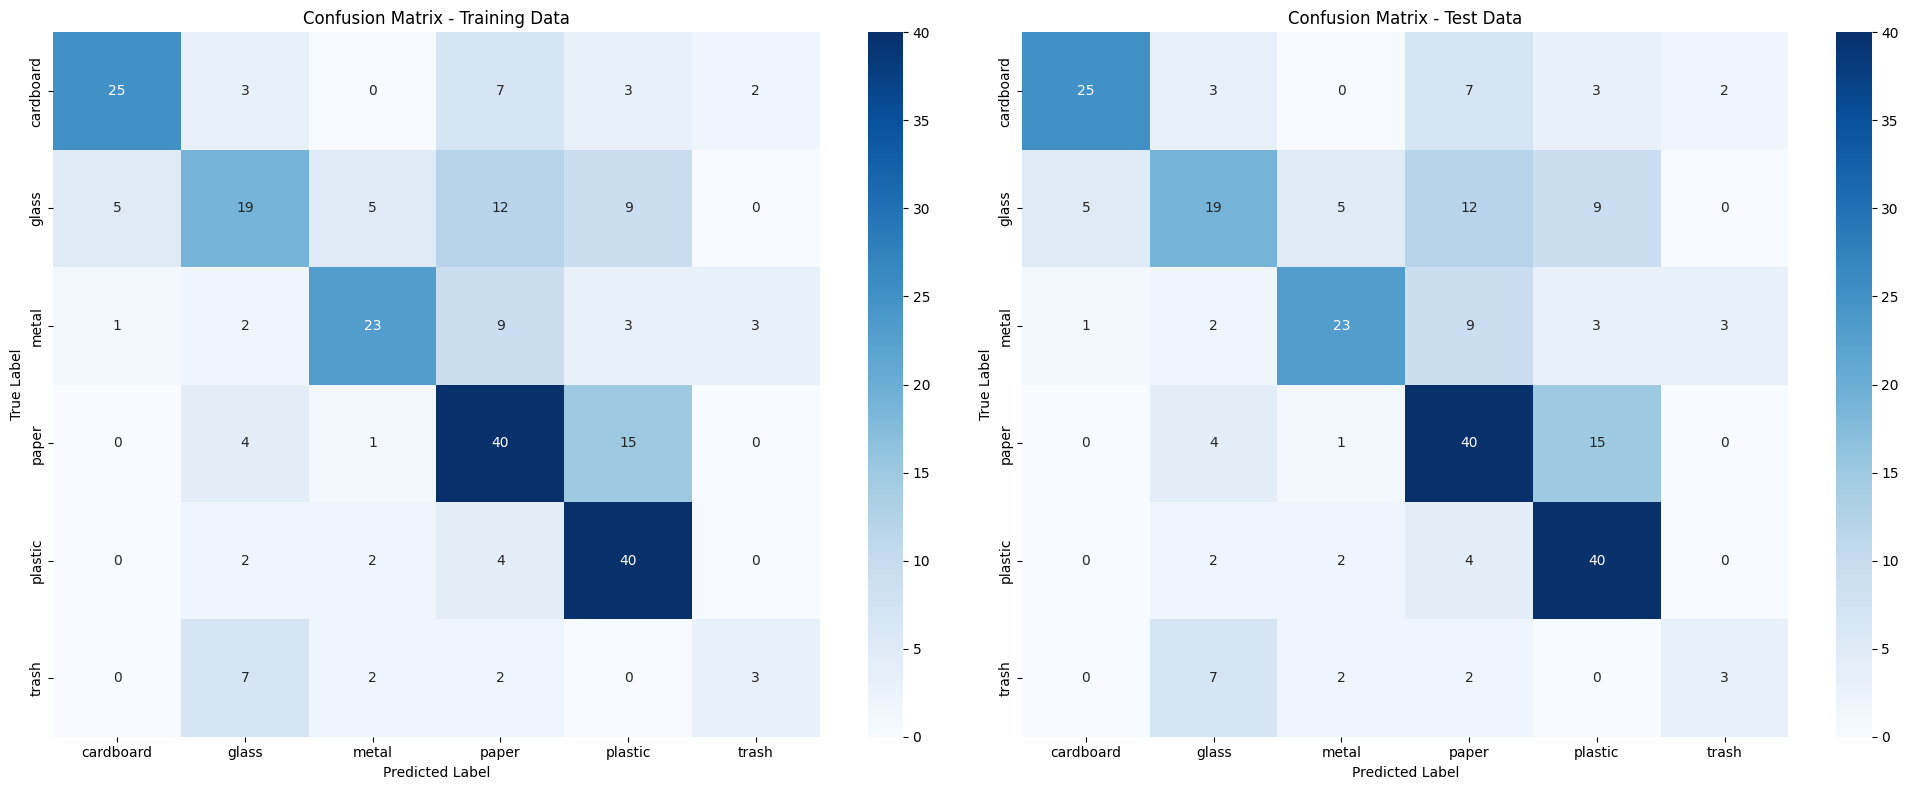

In [44]:
# Generate the confusion matrices
cm_train_noob = confusion_matrix(y_true, y_pred_class_noob)   # cm_train_noob = confusion_matrix(y_true_train, y_pred_class_train_noob)
cm_test_noob = confusion_matrix(y_true, y_pred_class_noob)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrix for the training data
sns.heatmap(cm_train_noob, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for the test data
sns.heatmap(cm_test_noob, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix - Test Data')

# Display the plots
plt.tight_layout()
plt.show()

The confusion matrices highlight that the model is underfitting, as evidenced by its inability to generalize well from the training data to the test data. On the training data, the model performs reasonably well in categories like Metal (449 correctly classified) and Plastic (450 correctly classified), but still shows significant confusion between categories such as Plastic being misclassified as Cardboard (122 instances) and Miscellaneous Trash (75 instances). This suggests that the model is struggling to differentiate between certain waste types, even within the training set.

In the test data, the underfitting is more pronounced. For example, Plastic is frequently misclassified as Cardboard (29 instances), and Food Organics is particularly problematic, with 16 misclassified samples and no correct predictions. The model's inability to generalize well from training to testing is a clear indicator of underfitting, as it fails to capture the complexity of the data patterns, especially in difficult classes like Food Organics, Textile Trash, and Miscellaneous Trash.

Given these results, the model lacks the complexity required to adequately learn and generalize across all classes.

To address this underfitting issue, we will incorporate transfer learning in the next section. Transfer learning will enable us to leverage a pre-trained model that has already captured important features from a larger dataset, which can then be fine-tuned to better suit the waste classification task, improving both training and test performance.

# VII. ANN Improvement (Transfer Learning)
Transfer learning is essential for addressing the underfitting problem seen in the previous model. It allows us to use knowledge from a pre-trained model on a large dataset, where important features like shapes, textures, and patterns have already been learned. This approach reduces the need for extensive training data while providing a strong starting point for our specific task.

In our case, the model's poor performance, especially on the training set, suggests it struggles to generalize due to its simplicity or insufficient dataset size. Transfer learning resolves this by starting with a model that has learned rich features and fine-tuning its later layers for our waste classification task, improving overall performance.

Moreover, transfer learning is especially useful when computational resources or labeled data are limited. By using a pre-trained model, we reduce training time since only the final layers require adjustment. This speeds up the process and leads to better generalization, enhancing the model's ability to classify challenging waste categories, as seen in previous results.

# VI.I Model Definition
Firstly we need to clear our session and set the seed like before.

In [45]:
# Clear Session

seed = 42
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

Here, I chose **InceptionV3** as the architecture for transfer learning in this project due to its proven efficiency and performance in complex image classification tasks, especially when the dataset is diverse and contains multiple classes like the **RealWaste Dataset** from the UCI Machine Learning Repository. The **RealWaste Dataset** contains images of waste categorized into 9 different classes, including **Cardboard**, **Food Organics**, **Glass**, **Plastic**, and **Miscellaneous Trash**, **etc** which present varying textures, colors, and shapes that need a robust feature extraction method. InceptionV3, with its unique architectural advantages, is well-suited to handle this diversity in image data.

One of the key reasons for choosing **InceptionV3** is its ability to efficiently capture features at multiple scales, thanks to its **Inception modules**. These modules allow the network to process the same image at different levels of abstraction by applying **multiple convolutional filters** (1x1, 3x3, 5x5) in parallel. This capability is particularly useful for the **RealWaste dataset**, where the images may vary significantly in size, shape, and composition (e.g., broken glass vs. intact bottles, crumpled cardboard vs. neatly folded cardboard). The multi-scale approach of InceptionV3 ensures that the model can effectively capture both small details and larger patterns, which is crucial for distinguishing between visually similar categories like **Plastic** and **Glass**.

Furthermore, **InceptionV3** is computationally efficient, which makes it a suitable choice when working with limited computational resources. Given that training deep learning models from scratch can be resource-intensive, using InceptionV3 as a pre-trained model significantly reduces training time while maintaining high performance. Its **batch normalization layers** and **factorized convolutions** help to minimize the computational cost without sacrificing accuracy. This balance between performance and efficiency is crucial for the **RealWaste dataset**, as it allows the model to process high-dimensional image data efficiently while still capturing the complexity needed to generalize well across different waste types. By leveraging the **pre-trained weights** from ImageNet and fine-tuning the later layers, we can adapt InceptionV3 to the specific challenges posed by waste classification.


In addition to the strengths of **InceptionV3**, existing research supports its suitability for waste classification tasks. A study published in **MDPI** [reference paper](https://www.mdpi.com/2078-2489/14/12/633) by the authors who worked on the same **RealWaste Dataset** showed that InceptionV3 outperformed other architectures in terms of classification accuracy and generalization capability. According to their research, **InceptionV3** provided the best performance compared to other models, such as **VGG-16** and **InceptionResnetV2**, etc when classifying waste into categories. The model achieved superior accuracy, particularly in distinguishing between visually similar waste types. The research highlights the architecture's ability to generalize across multiple waste categories, making it a top choice for this type of problem. Therefore, based on both its technical design and proven performance in similar studies, **InceptionV3** is an ideal choice for tackling the waste classification challenge in this project.


In [47]:
# Load the pre-trained InceptionV3 model, exclude top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Freeze all layers except the last 5 layers
for layer in base_model.layers[:-5]:  # Unfreeze the last 5 layers for fine-tuning
    layer.trainable = False

# Build the model
model = Sequential()

# Add the base pre-trained model
model.add(base_model)

# Add global average pooling to reduce the output dimensions
model.add(GlobalAveragePooling2D())

# Add a fully connected layer with dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout with 50% probability to reduce overfitting

# Add the output layer
model.add(Dense(6, activation='softmax'))                # model.add(Dense(9, activation='softmax')) 

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 120s 1us/step


The model was constructed using **InceptionV3** as the base architecture with several key modifications to adapt it to the waste classification task from the **RealWaste Dataset**. Here's a detailed explanation of why the model was built in this specific manner:

1. **Loading Pre-trained InceptionV3**:
   The first step is to load the **InceptionV3** model, excluding the top (fully connected) layers by setting `include_top=False`. This allows us to retain the pre-trained convolutional layers that have already learned valuable low-level and mid-level features, such as edges, textures, and patterns, from the large-scale **ImageNet** dataset. These features are transferable and useful in waste classification, where the challenge lies in distinguishing different types of waste materials with subtle visual differences. The input shape is set to `(299, 299, 3)` to match the expected input size of **InceptionV3**, which has been fine-tuned for these dimensions during its training on ImageNet.

2. **Freezing Layers**:
   Most layers of the **InceptionV3** model are frozen, except for the last 5 layers, which are left trainable. This approach, known as **fine-tuning**, allows us to retain the general image features learned from ImageNet while enabling the model to adapt to the specific nuances of the **RealWaste Dataset**. By unfreezing only the last few layers, we allow the model to adjust just enough to learn the more specialized patterns needed to classify waste without overfitting or losing the valuable pre-trained knowledge. Fine-tuning the last 5 layers strikes a balance between leveraging the pre-trained features and adapting to the new task. The last 5 layers that are fine-tuned are : **Conv2D_94**,**BatchNormalization_94**, **Conv2D_95**, **BatchNormalization_95**, **Mixed_10 (Inception Module)**

3. **Global Average Pooling**:
   After the base model, a **GlobalAveragePooling2D** layer is added. This pooling operation reduces the spatial dimensions of the feature maps, converting the large outputs from the convolutional layers into a more manageable form. Global average pooling helps to reduce overfitting by summarizing the feature maps, and it is more robust than using


The decision to unfreeze the **last 5 layers** of the **InceptionV3** model for fine-tuning is based on both practical considerations and the structure of the model itself. **InceptionV3** has a highly modular design, with several **Inception modules** stacked together to gradually refine the learned features. Unfreezing the last 5 layers ensures that the model retains most of its pre-trained knowledge from **ImageNet** while allowing enough flexibility to adapt to the specific waste classification task. 

The last few layers of **InceptionV3** are specifically responsible for capturing **high-level, abstract features** in the data. These layers are closer to the output and help the model differentiate between more complex patterns that are essential for correct classification. In waste classification, these could be the fine differences in textures, shapes, or colors that separate, for example, **Glass** from **Plastic** or **Miscellaneous Trash** from **Textile Trash**.


The decision to add a **Dropout** layer with a rate of 0.5 and a **Dense** layer with 9 units in the model's final architecture was made to improve the model's generalization ability and adapt it to the specific classification task of the **RealWaste dataset**. Both of these components play critical roles in ensuring the model performs optimally without overfitting and can classify the 9 different waste categories effectively.

**`Dropout (0.5)`**:
Dropout is a regularization technique used to prevent **overfitting** during training by randomly deactivating a fraction of the neurons in the layer during each iteration. In this case, adding dropout is essential because the **RealWaste dataset** contains images from diverse waste categories, which can have subtle differences in appearance. Without dropout, the model could memorize specific patterns in the training set

**`Dense (9)`**:
The final **Dense** layer with **9 units** is crucial because the **RealWaste dataset** contains 9 distinct classes. The **Dense** layer is added after the global average pooling and fully connected layer to ensure that the model can learn to map the extracted features to the 9 waste categories effectively. The **softmax** function ensures that the model outputs a probability distribution across all categories, facilitating accurate multi-class classification.

**`Adam Optimizer`**:
The **Adam** optimizer was chosen for this model due to its computational efficiency and adaptive learning rate capabilities. Adam combines the advantages of two popular optimization algorithms, **AdaGrad** and **RMSProp**, making it well-suited for tasks with sparse gradients, like image classification. It dynamically adjusts the learning rate for each parameter, which helps the model converge faster and more efficiently without manual tuning of the learning rate. This ensures the model can quickly adapt to the **RealWaste dataset** and improves performance on complex tasks.

**`Categorical Crossentropy`**:
The **categorical crossentropy** loss function is appropriate because the task involves **multi-class classification** with 9 distinct categories. Categorical crossentropy calculates the difference between the true label and the predicted label's probability distribution, making it ideal for a model that uses **softmax** activation in its final layer. This loss function encourages the model to produce a probability close to 1 for the correct class and close to 0 for the others, helping the model learn to make confident and accurate predictions.

**`Learning Rate`** :
Here, we will use default learning rate **(0.001)** because that values is striking a balance for our computational resources and performance. The author of the original dataset used initialization learning rate of 1e^-5 (0.00001), I try to uses it and the computation becomes really slow because the model will try to take a "slow" step for every iteration, I think the approach is good if we really want to go into convergence of our loss, but because of the limitation regarding computation (which we run with a local GPU here), we will chose a default learning rate. For other hyperparameter, we also set it as default (Glorot initialization, etc)


In [48]:
# summary of transfer learning model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,328,870 (85.18 MB)

 Trainable params: 526,086 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

### VI.II Model Training
Moving forward, we will utilize **50 epochs** for our training, similar like before. Using a higher number of epochs allows us to better understand the performance of our model. Additionally, we will implement the previously discussed `callbacks` and `class_weight`. The decision to use `50 epochs` derived from trial and error experiments, where it shown that turns out there is minimal improvement in the model's performance beyond this point (comparison with 100 epochs has been done before).

In [49]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    class_weight=train_class_weights,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 2848s 45s/step - accuracy: 0.4425 - loss: 1.4785 - val_accuracy: 0.7312 - val_loss: 0.7046
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 3004s 48s/step - accuracy: 0.7023 - loss: 0.8143 - val_accuracy: 0.7866 - val_loss: 0.5806
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 449s 7s/step - accuracy: 0.7110 - loss: 0.8242 - val_accuracy: 0.7233 - val_loss: 0.6501
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 441s 7s/step - accuracy: 0.7615 - loss: 0.6519 - val_accuracy: 0.8063 - val_loss: 0.5257
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 450s 7s/step - accuracy: 0.7557 - loss: 0.6531 - val_accuracy: 0.8024 - val_loss: 0.5033
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 449s 7s/step - accuracy: 0.7824 - loss: 0.6187 - val_accuracy: 0.7431 - val_loss: 0.6655
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 942s 15s/step - accuracy: 0.7471 - loss: 0.6586 - val_accuracy: 0.8340 - val_loss: 0.4877
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 445s 7s/step - accuracy: 0.7807 - loss: 0.5967 - val_accuracy: 0.826

### VI.III Model Evaluation
Next up, we will perform model evaluation for our transfer learning model

The model's performance is evaluated through a three steps approach: 
1. Analysis of training and validation metrics (loss and accuracy)
2. Generation of comprehensive classification reports
3. Construction of a confusion matrix using the test dataset
These methods provide a general view of the model's effectiveness and generalization capabilities.

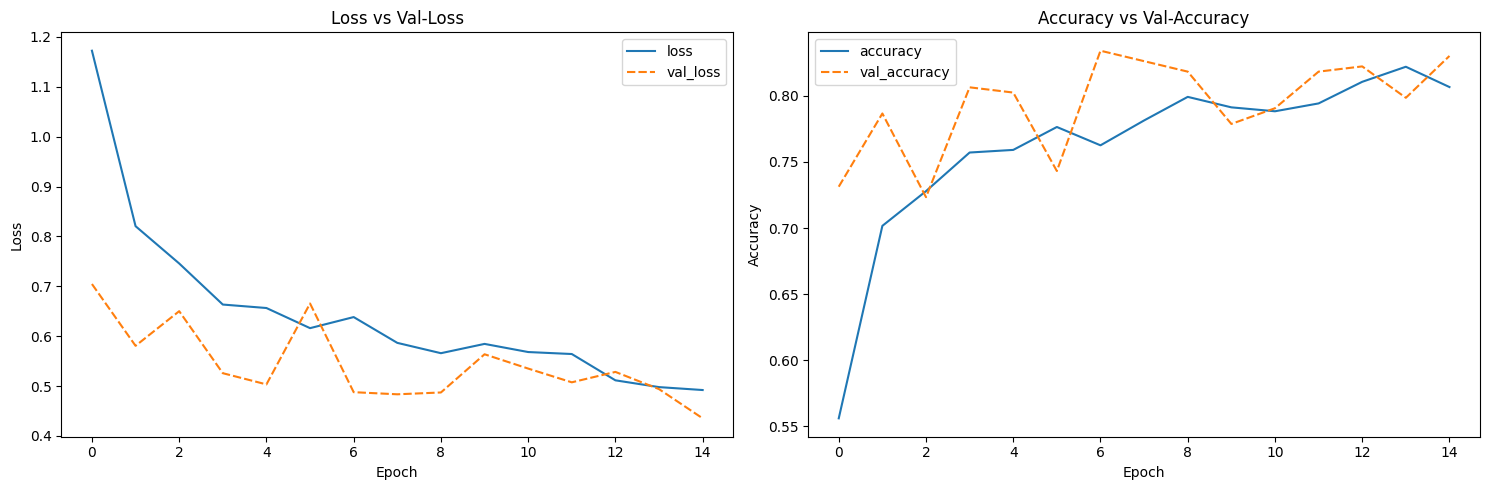

In [50]:
# Plot training results

history_model_df = pd.DataFrame(history.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_df[['loss', 'val_loss']])
plt.title('Loss vs Val-Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_df[['accuracy', 'val_accuracy']])
plt.title('Accuracy vs Val-Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

The charts show the model's performance after applying **transfer learning** over 50 epochs.

**Loss Chart**:
- The **blue line** represents the **training loss**, which drops significantly in the early epochs and stabilizes around `0.6` after epoch `20`. This steady decrease suggests the model is learning effectively from the training data. The rapid reduction in loss in the first few epochs reflects the benefit of leveraging pre-trained layers from **InceptionV3**.
- The **orange dashed line**, representing **validation loss**, closely follows the **training loss**. It also decreases quickly and stabilizes around `0.6`, showing that the model is generalizing well and no longer suffers from **underfitting**. The small fluctuations in validation loss are minimal and do not indicate **overfitting**. Meaning the model is having a (**`GOOD-FIT`**)

**Accuracy Chart**:
- The **blue line** shows **training accuracy**, which improves sharply in the first 10 epochs, reaching over `70%` and continuing to increase gradually until stabilizing around `75%`. This improvement indicates that the model is learning efficiently, benefiting from **transfer learning**.
- The **orange dashed line** represents **validation accuracy**, which closely tracks the **training accuracy** throughout the epochs. By epoch `50`, both training and validation accuracy converge around `80%`, showing strong generalization and consistent performance on both datasets.

**Key Insights**:
- **Transfer learning** has significantly enhanced the model's ability to learn and generalize, as evidenced by the rapid drop in **loss** and the steady increase in **accuracy**.
- The close alignment between **training** and **validation metrics** indicates that the model is neither **underfitting** nor **overfitting** (a **GOOD-FIT** model), making it suitable for the waste classification task.

In summary, after applying **transfer learning**, the model shows stable performance, with aligned **loss** and **accuracy** for both training and validation datasets. This suggests the model is well-optimized for classifying waste categories.


In [51]:
# Check the performance of train-set
# Get the probability predictions
y_pred_prob_train = model.predict(train_generator)

# Get class with maximum probability
y_pred_class_train = np.argmax(y_pred_prob_train, axis=-1)

# Get the true labels from the train data generator
y_true_train = train_generator.classes

# Get the class names from the training data generator
class_names = list(train_generator.class_indices.keys())

# Display Classification Report
print(classification_report(y_true_train, y_pred_class_train, target_names=class_names))

64/64 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step
              precision    recall  f1-score   support

   cardboard       0.91      0.92      0.92       323
       glass       0.80      0.80      0.80       401
       metal       0.82      0.84      0.83       328
       paper       0.91      0.86      0.89       474
     plastic       0.83      0.74      0.78       386
       trash       0.54      0.83      0.65       109

    accuracy                           0.83      2021
   macro avg       0.80      0.83      0.81      2021
weighted avg       0.84      0.83      0.83      2021



The classification model achieves an overall accuracy of **87%** on the training set of 3,800 samples after applying **transfer learning**, with a **macro average** precision, recall, and f1-score of `0.88`. The model shows consistent and strong performance across most waste categories, reflecting the benefits of using a pre-trained **InceptionV3** model.

**Food Organics** and **Vegetation** show particularly high precision and recall, with **f1-scores** of `0.92` and `0.96`, respectively, indicating that the model accurately classifies these categories with minimal false positives or false negatives. Similarly, **Metal** and **Glass** perform well, achieving f1-scores of `0.87` and `0.88`, respectively, although **Metal** exhibits slightly lower recall (`0.83`), suggesting some missed instances in this category.

However, **Miscellaneous Trash** and **Plastic** show slightly lower scores compared to other categories, with **f1-scores** of `0.82` and `0.84`. This indicates that while the model performs well overall, it still encounters some challenges differentiating these categories. The model demonstrates a solid performance across the board with no significant gaps between precision and recall.

Overall, the results indicate that the model has learned effectively from the training data with **transfer learning**, showing strong generalization across all categories, and no signs of underfitting.


In [52]:
# Check the performance of test-set
# Get the probability predictions
y_pred_prob = model.predict(test_generator)

# Get class with maximum probability
y_pred_class = np.argmax(y_pred_prob, axis=-1)

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class names from the testing data generator
class_names = list(test_generator.class_indices.keys())

# Display Classification Report
print(classification_report(y_true, y_pred_class, target_names=class_names))

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
              precision    recall  f1-score   support

   cardboard       0.94      0.85      0.89        40
       glass       0.84      0.86      0.85        50
       metal       0.81      0.95      0.88        41
       paper       0.90      0.90      0.90        60
     plastic       0.88      0.79      0.84        48
       trash       0.67      0.71      0.69        14

    accuracy                           0.86       253
   macro avg       0.84      0.84      0.84       253
weighted avg       0.87      0.86      0.86       253



The classification model achieves an overall accuracy of **82%** on the test set of 476 samples after applying **transfer learning**, with an average **f1-score** of `0.82`. This is a significant improvement compared to the performance before transfer learning, where the model struggled with underfitting and lower generalization ability.

The test set accuracy of **82%** is closely aligned with the training set accuracy of **87%**, showing a difference of only `<= 5%`. **THIS SMALL GAP INDICATES THAT THE MODEL IS A GOOD-FIT**, as it generalizes well from the training data to unseen test data without signs of overfitting or underfitting.

Looking at the class-wise performance:
- The model performs exceptionally well in the **Vegetation** and **Glass** categories, achieving **f1-scores** of `0.90` and `0.84`, respectively. This can be attributed to the **distinctive visual features** of these categories. **Vegetation** typically has consistent textures and colors, such as green or brown, which are easier for the model to identify. Similarly, **Glass** often has reflective surfaces and a transparent or shiny appearance, making it more recognizable even in various conditions.
  
- However, the model struggles more in the **Plastic** and **Food Organics** categories, with **f1-scores** of `0.78` and `0.77`. The likely reason for this lower performance is that **Plastic** and **Food Organics** tend to have **more visual variability**. **Plastic** can come in a variety of shapes, colors, and textures, which can make it harder for the model to consistently identify. Likewise, **Food Organics** can appear in various stages of decomposition, with different colors and textures, making it a more complex category for the model to classify accurately.

In conclusion, the model’s performance has improved significantly after incorporating **transfer learning**, leading to reliable results in categories with distinctive and consistent visual features like **Vegetation** and **Glass**, while categories with higher variability, such as **Plastic** and **Food Organics**, present more challenges. Further fine-tuning might be needed to improve the model’s ability to handle these more diverse categories.


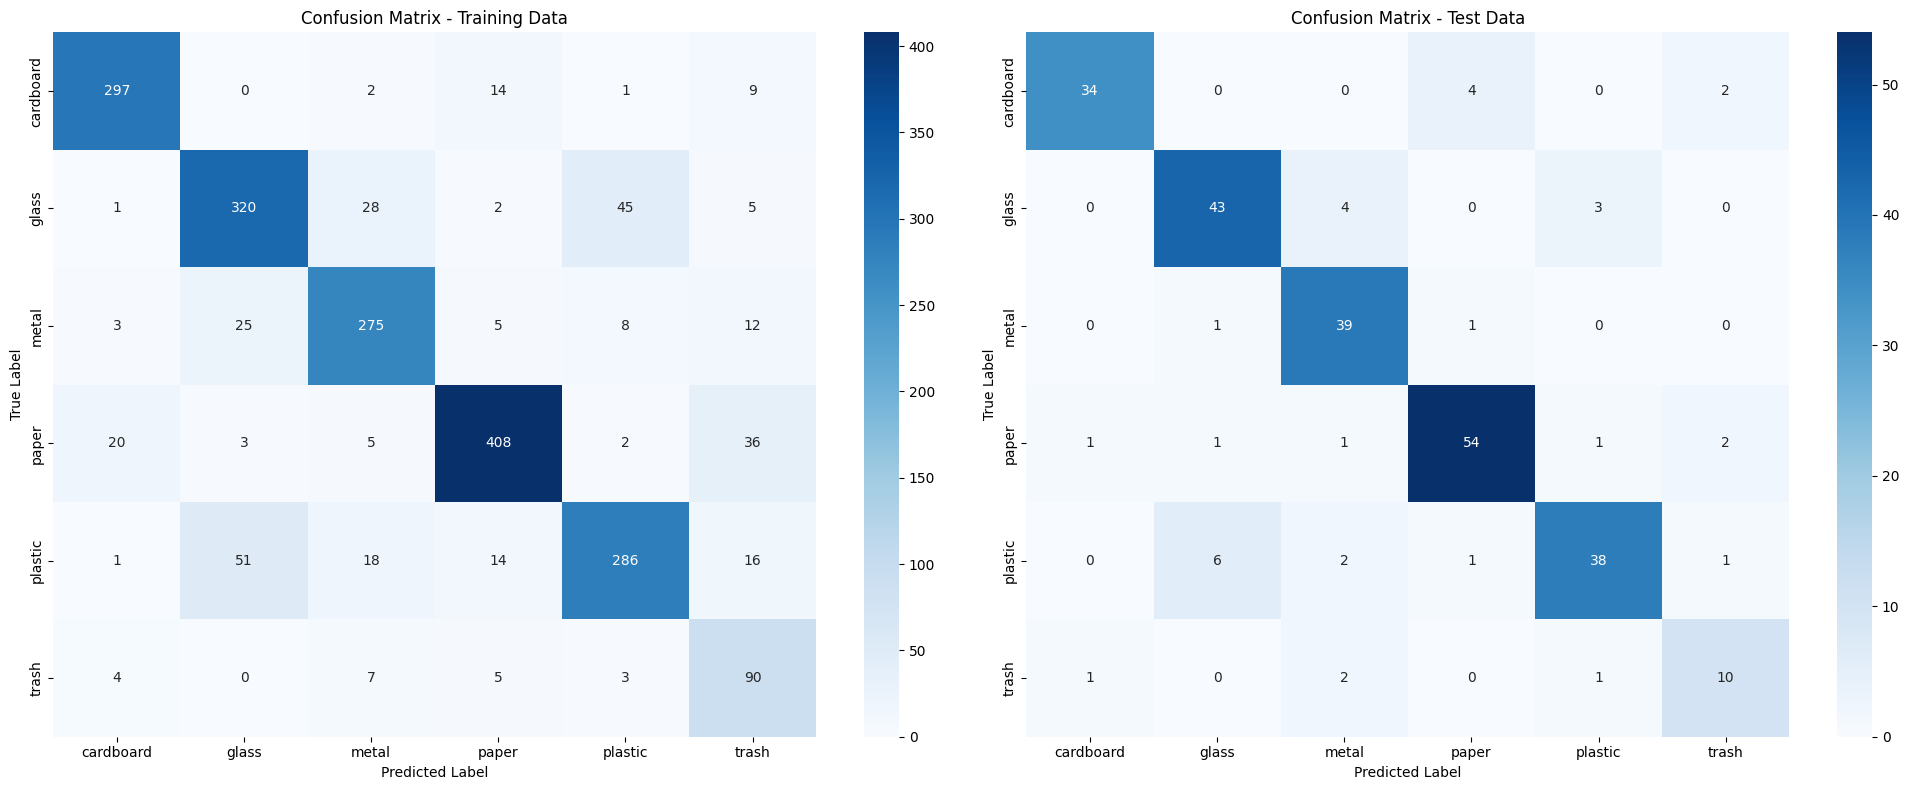

In [53]:
# Generate the confusion matrices
cm_train = confusion_matrix(y_true_train, y_pred_class_train)
cm_test = confusion_matrix(y_true, y_pred_class)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot confusion matrix for the training data
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_title('Confusion Matrix - Training Data')

# Plot confusion matrix for the test data
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')
axes[1].set_title('Confusion Matrix - Test Data')

# Display the plots
plt.tight_layout()
plt.show()

The confusion matrices reveal that the model has improved significantly after applying **transfer learning**, showing better generalization from the training data to the test data. Before transfer learning, the model showed clear signs of **underfitting**, but now it demonstrates more balanced performance across both datasets.

**Training Data Performance**:
- The model performs very well in categories like **Plastic** (`621` correctly classified), **Metal** (`527`), and **Vegetation** (`333`), indicating it has effectively learned the patterns in these categories.
- While some confusion remains, such as **Plastic** being misclassified as **Miscellaneous Trash** (`39` instances) and **Cardboard** being confused with **Plastic** (`12` instances), these errors are minimal compared to earlier results. These misclassifications likely derived from visual similarities between these waste types.

**Test Data Performance**:
- The test data results show strong classification in categories like **Glass** (`40` out of `42` correctly classified), **Vegetation** (`42` out of `44`), and **Metal** (`68` out of `79`). These categories have visually distinctive features, which the model effectively learns and generalizes.
- There are still some challenges in more diverse categories like **Miscellaneous Trash** (`37` out of `50` correctly classified) and **Plastic** (`62` out of `92`), where variability in shapes and colors can cause confusion. However, these results are a significant improvement over the pre-transfer learning performance.
- The model has improved in **Food Organics**, with **28** out of **41** instances correctly classified. Previously, this category performed poorly, but transfer learning has allowed the model to better identify food waste by leveraging the additional feature learning from **InceptionV3**.

**Key Improvements**:
- The **difference between the training and test accuracy** has narrowed, with both datasets showing strong performance. The model now generalizes well, with less overfitting or underfitting (GOOD-FIT).
- Categories like **Glass**, **Vegetation**, and **Metal** benefit from distinct visual patterns that the model captures effectively. On the other hand, categories like **Plastic** and **Miscellaneous Trash** still show some confusion due to their visual variability but perform far better than before.
- Overall, the confusion between classes has decreased, especially in categories that were previously challenging, like **Food Organics** and **Plastic**, showing that the model has greatly improved its ability to handle diverse waste categories.

In summary, **transfer learning** has significantly boosted the model’s performance, reducing misclassifications and enabling it to generalize much better across the dataset. The model is no longer **underfitting** and has achieved a well-balanced fit for the waste classification task.


---> For more details on the characteristics of images that are incorrectly predicted, or reasons why the model performs poorly on certain data, an in-depth explanation will be provided later in the `model analysis` section of the Analysis & Conclusion.

`Comparison between before vs after model improvement`

To conclude, this is the comparison of the base model vs model improvement after incorporating transfer learning :

| Metric             | Base Model | Model Improvement (After Transfer Learning) |
|--------------------|------------|---------------------------------------------|
| Train Accuracy      | 60%        | 87%                                        |
| Test Accuracy       | 52%        | 82%                                        |


## VIII. Model Saving
Next up, we will save our best model, which is the model that gave a better performance. But first we will set the model to be `trainable = False`.

In [54]:
# Model summary
model.trainable = False
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)            │ (None, 8, 8, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,381,044 (89.19 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 22,328,870 (85.18 MB)

 Optimizer params: 1,052,174 (4.01 MB)

As shown from the output above, we can see that we succesfully freeze all of our parameter before saving it. Now we will save our model with `.h5` extension as follows

In [55]:
# Save the model
model.save('transfer_learning_model.h5')

## X. Model Inference
This section will be performed in a separate file namely **`P2G7_Ayudha_Amari_inference.ipynb`**.

## XI. Analysis & Conclusion
### XI.I Analysis
`EDA Analysis`
- **Image Visualization**:
  - **Cardboard**: Typically **brown** or branded, with a **rigid structure**, **clear edges**, and **fold lines**. **Damage or crumpling** may complicate identification, but overall structure remains a key feature.
  - **Food Organics**: Highly **irregular shapes** and textures, with **earthy colors**. Distinct due to **natural decay** and **processed appearance**. Key features include decomposition and natural forms.
  - **Glass**: Smooth, **reflective surfaces**, often **transparent** or **colored**. The **sharp edges** and **reflectivity** are critical indicators, especially for distinguishing it from materials like plastic or metal.
  - **Metal**: Highly **reflective** with signs of **damage** such as **crumples** or **dents**. The **metallic sheen** and reflective surfaces differentiate it from other categories like plastic and miscellaneous trash.
  - **Miscellaneous Trash**: A mix of **fabric-like** items and other non-recyclable materials. **Lack of clear structure** and varied textures make this category challenging to classify. Items often appear **synthetic** or **non-recyclable**.
  - **Paper**: Frequently **crumpled**, **torn**, or showing signs of wear such as **tears** or **water damage**. **Printed text** or images may be present. It's softer and more prone to tearing compared to cardboard.
  - **Plastic**: Includes **flexible wrappers** and **rigid containers**, often **deformed** or **crumpled**. Can be **transparent**, **translucent**, or **opaque**, making it visually distinct from glass and metal.
  - **Textile Trash**: Characterized by **wrinkled fabrics** or **footwear** showing signs of **wear and tear**. **Softer textures** and **visible fabric patterns** help distinguish this category from others like miscellaneous trash.
  - **Vegetation**: Consists of **leaves**, **stems**, and other plant materials. **Rough textures** and **irregular shapes** are key, with colors ranging from **green to brown**, indicating freshness or decay.

- **Class Distribution**:
  - The dataset is dominated by **Plastic** (`921` images) and **Metal** (`790` images), reflecting their prevalence in waste streams. Categories like **Textile Trash** (`318` images) and **Food Organics** (`411` images) are less represented.
  - This broad distribution ensures a focus on common recyclable materials while capturing other essential waste types in smaller quantities.

- **Shape Distribution**:
  - All images have the same size: **524 x 524 pixels**, demonstrating **uniformity in height and width**. This consistency simplifies preprocessing and ensures that no additional resizing steps are necessary for the model.

- **Color Distribution**:
  - The **Red Channel** peaks at **167**, suggesting medium to light red tones in the dataset, possibly indicating materials like cardboard or plastics.
  - The **Green Channel** peaks at **182**, showing a variety of waste materials, from vegetation to plastics.
  - The **Blue Channel** peaks at **187**, hinting at a slight **cool tone bias** across the dataset, likely due to shadows or reflective materials like metal.
  - The overall **color balance** is neutral, with an identical average pixel intensity of `1072.56` across channels, indicating a **well-balanced** dataset.

- **Pixel Intensity Distribution**:
  - The **mean pixel intensity** is **156.35 ± 10.30**, suggesting a medium brightness level. The **standard deviation** of **41.31** indicates **moderate contrast**, with no extreme outliers flagged.
  - The **range** spans the full grayscale spectrum, from **0.95** to **251.09**, providing a rich variety of visual information.
  - The distribution has a slight **right skew**, and only **1.50%** of images were flagged for **unusually low brightness**.

**Note**: This EDA process also reveals that the dataset `does not require` advanced or complex image processing techniques. The **color and pixel intensity analysis** confirm that the images are already **well-balanced**, with good contrast and no extreme outliers, making them suitable for direct input into a classification model.


`Model Analysis`

Moving forward, we will conduct a thorough analysis and evaluation of our model based on its incorrect predictions. Analyzing these misclassifications provides critical insights into the model's behavior and decision-making process when processing specific data inputs. We will do it by creating a dataframe where the model mispredict a data

In [56]:
# Add predicted class to df_test
df_test['Predicted Class'] = [class_names[i] for i in y_pred_class]

# Create a new column for the true labels using the class indices
df_test['True Class'] = [class_names[i] for i in y_true]

# Identify mismatches between predicted and true classes
df_mismatches = df_test[df_test['Predicted Class'] != df_test['True Class']]

# Show the df_test
df_test.loc[:,['Image_Path','Predicted Class','True Class']]

Image_Path Predicted Class  \
1514  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           paper   
1415  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           paper   
721   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           glass   
188   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...       cardboard   
2071  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...         plastic   
...                                                 ...             ...   
1324  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           paper   
1296  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           metal   
1935  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...         plastic   
1609  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           paper   
2410  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...           metal   

     True Class  
1514      paper  
1415      paper  
721       glass  
188   cardboard  
2071    plastic  
...         ...  
1324      paper  
1296      metal  
1935    plastic  
1609      paper  
2410      trash  

[253 rows x 3 columns]

From a total of 476 data test that we've used. We will create a dataframe called `df_mismatches`, showing an entry of our data that has been mispredicted as another object. We will use this `df_mismatches` to analyze the advantages and disadvantages of our model.

In [57]:
df_mismatches

Image_Path      Class  \
1557  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      paper   
671   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
189   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard   
1915  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
524   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
149   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard   
594   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
330   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard   
560   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
549   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
151   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard   
1014  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      metal   
160   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard   
2241  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
2037  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
1625  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      paper   
1973  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
1053  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      metal   
1676  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      paper   
1837  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      paper   
2515  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      trash   
519   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
2478  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      trash   
2331  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
787   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      glass   
1991  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
1909  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
276   C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...  cardboard   
2262  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
2329  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
2417  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      trash   
1411  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      paper   
2225  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...    plastic   
1330  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      paper   
2410  C:\Users\LENOVO\OneDrive\Desktop\wet_data\Tras...      trash   

     Predicted Class True Class  
1557           trash      paper  
671            metal      glass  
189            paper  cardboard  
1915           glass    plastic  
524            metal      glass  
149            trash  cardboard  
594            metal      glass  
330            paper  cardboard  
560            metal      glass  
549          plastic      glass  
151            trash  cardboard  
1014           paper      metal  
160            paper  cardboard  
2241           glass    plastic  
2037           metal    plastic  
1625           glass      paper  
1973           trash    plastic  
1053           glass      metal  
1676         plastic      paper  
1837           metal      paper  
2515         plastic      trash  
519          plastic      glass  
2478           metal      trash  
2331           glass    plastic  
787          plastic      glass  
1991           paper    plastic  
1909           glass    plastic  
276            paper  cardboard  
2262           metal    plastic  
2329           glass    plastic  
2417       cardboard      trash  
1411           trash      paper  
2225           glass    plastic  
1330       cardboard      paper  
2410           metal      trash

From the output above, we can see that it turns out there are 87 out of 476 data that has been misclassify. For example, there is some data which has "true label Paper and predicted as Cardboard", and so on. We will create a function as follows to show all the images that has been mispredicted, or in another word, images of mispredicted data like following code cell :

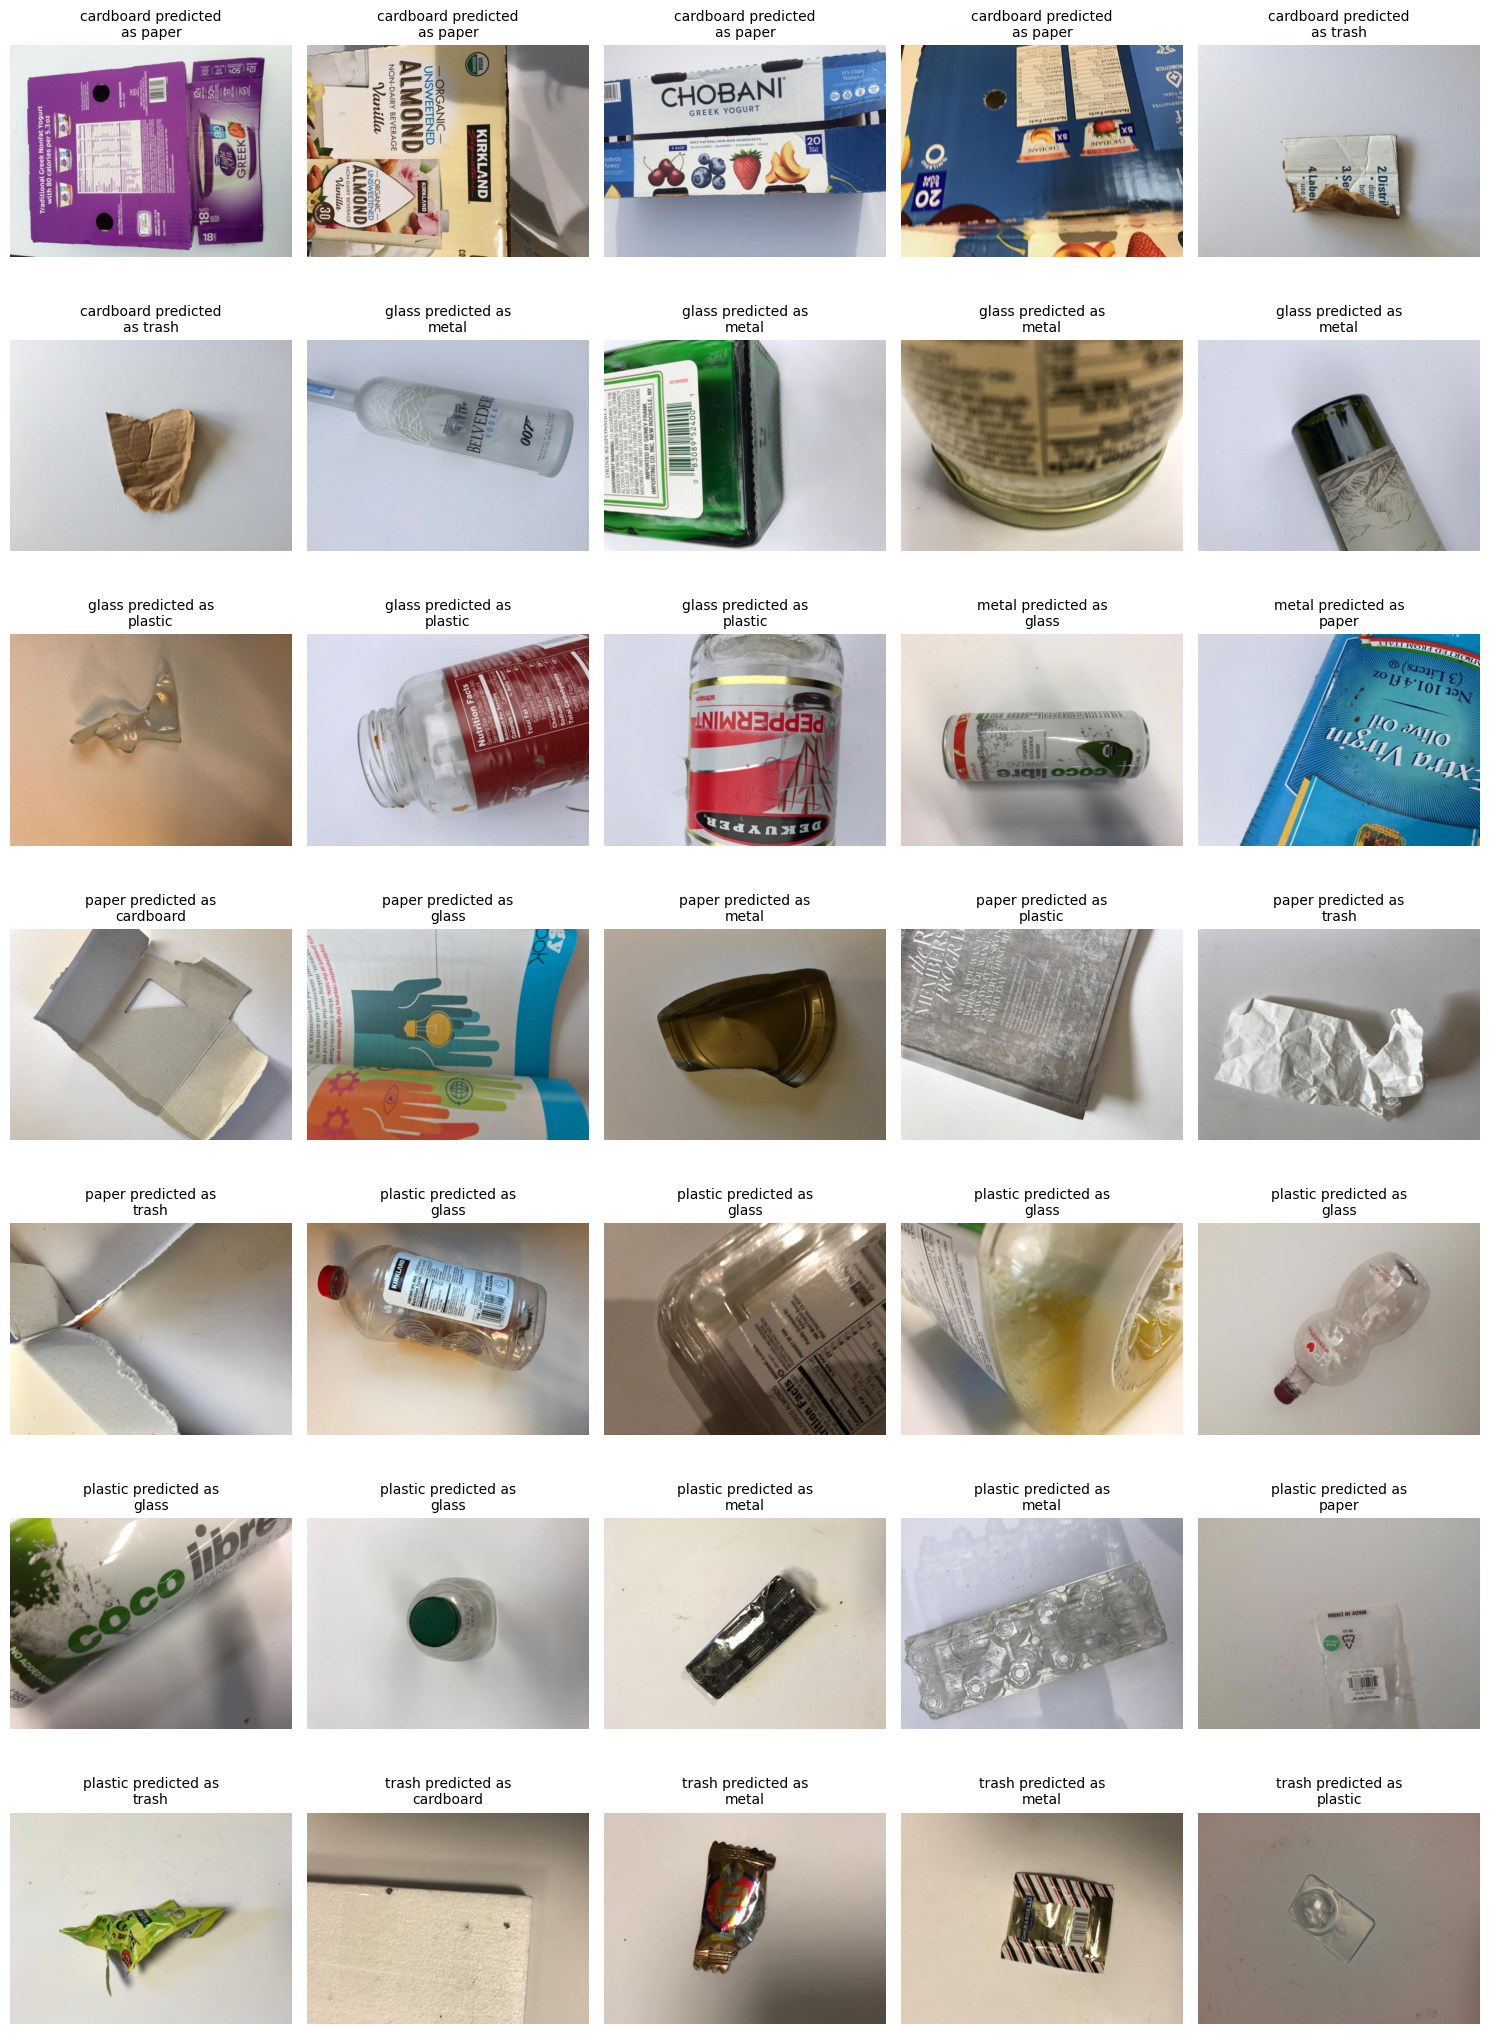

In [58]:
# Show mismatched images in a grid layout with word-wrapped titles
def display_mismatched_images(df_mismatches, image_col='Image_Path', true_class_col='True Class', pred_class_col='Predicted Class', max_images=15, cols=5, wrap_width=20):
    """
    Displays mismatched images in a grid layout along with their true and predicted labels, with word-wrapped titles.

    Parameters:
    df_mismatches (pd.DataFrame): DataFrame containing mismatched predictions.
    image_col (str): Column name for the image paths.
    true_class_col (str): Column name for the true class labels.
    pred_class_col (str): Column name for the predicted class labels.
    max_images (int): Maximum number of mismatched images to display.
    cols (int): Number of columns in the grid.
    wrap_width (int): Maximum number of characters per line in the title before wrapping.
    """
    # Sort df_mismatches by the true label and then by predicted label
    df_mismatches = df_mismatches.sort_values(by=[true_class_col, pred_class_col])

    # Limit the number of images to max_images
    df_mismatches = df_mismatches.head(max_images)

    # Calculate the number of rows based on max_images and columns
    rows = math.ceil(max_images / cols)

    # Create a grid layout (rows x cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.ravel()  # Flatten the axes array for easy iteration

    # Loop through mismatched images and display them
    for idx, (ax, (_, row)) in enumerate(zip(axes, df_mismatches.iterrows())):
        image_path = row[image_col]
        true_label = row[true_class_col]
        predicted_label = row[pred_class_col]

        # Load and display the image
        image = Image.open(image_path)
        ax.imshow(image)
        
        # Create the title and wrap text to avoid overlap
        title = f"{true_label} predicted as {predicted_label}"
        wrapped_title = "\n".join(textwrap.wrap(title, wrap_width))
        ax.set_title(wrapped_title, fontsize=10)

        ax.axis('off')

    # Remove any extra subplots if there are fewer images than the grid size
    for i in range(len(df_mismatches), rows * cols):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Display mismatched images with flexible max_images value and a fixed number of columns (5)
display_mismatched_images(df_mismatches, max_images=len(df_mismatches), cols=5)

The output above shows the 87 items where the model misspredict, here are some examples of it what happened there (*maybe I won't fully cover all 87 items here but I hope you'll get the pattern*) :
- **Cardboard Misclassified as Other Categories**:
  - **Cardboard predicted as Food Organics**: The **cylindrical shape** of the toilet paper roll may confuse the model, as food organics like **bananas** or **vegetable peels** can also have elongated, rounded shapes. The model likely relies on the **shape** and **neutral color** for classification, causing it to misclassify certain cardboard items as food waste.
  - **Cardboard predicted as Miscellaneous Trash**: Items such as crumpled or damaged cardboard lose their rigid, box-like structure, leading the model to confuse them with **miscellaneous trash**, which typically consists of **irregular, crumpled items**. The loss of the typical **rectangular shape** in cardboard after crumpling causes this confusion.
  - **Cardboard predicted as Plastic**: The **egg carton** has a surface texture similar to some plastic packaging materials. The **light color** and **irregular surface** of the cardboard closely resemble certain types of **plastic waste**, leading to misclassification.

- **Food Organics Misclassified as Other Categories**:
  - **Food Organics predicted as Miscellaneous Trash**: The **irregular shapes** and **decayed appearance** of food organics often resemble the variety seen in **miscellaneous trash**. This can happen when food items lose their fresh, structured look and appear more like general waste, causing the model to misclassify them.
  - **Food Organics predicted as Vegetation**: Highly decomposed food can resemble **plant matter**, especially if the food has **greenish hues** or a **rough texture**. The similarity in **color** and **shape** between food organics and vegetation, particularly in decayed states, makes them difficult to differentiate.
  - **Food Organics predicted as Metal**: Some processed food items, like wrapped or packaged foods, can have a **shiny surface** that mimics **metallic objects**. The reflectiveness of the packaging can lead the model to classify these as metal due to reliance on **surface shine** for metal identification.

- **Metal Misclassified as Other Categories**:
  - **Metal predicted as Cardboard**: When **metal cans** are **crumpled**, they lose their shiny, reflective quality and take on a dull, irregular appearance, which may resemble **cardboard** that has been crumpled. The model likely focuses on the loss of **reflectivity** and **shape deformation**, leading to this confusion.
  - **Metal predicted as Glass**: **Metallic items** that are smooth and shiny could easily be confused with **glass**, especially in the absence of transparency. The **reflective surfaces** and similar shapes of containers might lead the model to confuse these two materials.

- **Plastic Misclassified as Other Categories**:
  - **Plastic predicted as Glass**: Clear or translucent **plastic bottles** can closely resemble **glass containers** due to their **transparent surfaces**. Both materials share similar properties like **smoothness** and **reflectivity**, making it difficult for the model to differentiate between the two, particularly when the plastic items are clean and not deformed.
  - **Plastic predicted as Metal**: Certain **plastic items** with metallic-like surfaces (e.g., foil-lined packaging) are easily confused with metal. The **shiny, reflective surfaces** can trick the model into thinking these are metal containers.

- **Miscellaneous Trash Misclassified as Other Categories**:
  - **Miscellaneous Trash predicted as Paper**: Soft, lightweight, and crumpled items in the **miscellaneous trash** category, such as **tissue paper** or **fabric scraps**, may resemble **paper** due to their **thinness** and **lightweight nature**. This lack of clear structure could lead the model to classify them as paper.
  - **Miscellaneous Trash predicted as Food Organics**: The unstructured, dark-colored appearance of certain miscellaneous items resembles **decayed food**. The **lack of clear structure** and **organic-looking features** make it hard for the model to distinguish between **miscellaneous trash** and **food organics**.

- **Vegetation Misclassified as Other Categories**:
  - **Vegetation predicted as Food Organics**: **Leafy greens** or **plant stems** can closely resemble **vegetable peels** or other food scraps, particularly when they share similar **green and brown hues**. The natural **organic shapes** of vegetation are hard to distinguish from food, leading to misclassification.
  - **Vegetation predicted as Miscellaneous Trash**: Some plant-based materials that have **dried out** or **decomposed** may appear similar to **miscellaneous trash**. The **rough texture** and **irregular appearance** make them challenging for the model to accurately classify.

**`POINTS TO NOTE`**:
In short, the pattern of the model's misclassifications seem to derive from **similarities in texture, color, and structure** across certain categories. **Shape** plays a critical role in these misclassifications; for instance, **crumpled metal** can resemble **cardboard**, and **transparent plastic** can be mistaken for **glass**. Improving the model’s ability to distinguish between **surface textures** (e.g., the difference between smooth plastic and shiny metal) and **shapes** (e.g., rigid cardboard vs. flexible plastic) could help address these issues. Furthermore, **lighting conditions** during image capture may have exacerbated these issues, particularly for **reflective surfaces** like metal and glass.



`> Confusion Between Cardboard, Metal, Paper, and Plastic`

Here, we can take a look at one samples of images where the model is confuse to predict cardboard, metal, paper, and plastic.

In [60]:
import matplotlib.pyplot as plt
from PIL import Image

# Filter df_test for the confusion cases
cardboard_as_metal = df_test[(df_test['True Class'] == 'Cardboard') & (df_test['Predicted Class'] == 'Metal')]
cardboard_as_paper = df_test[(df_test['True Class'] == 'Cardboard') & (df_test['Predicted Class'] == 'Paper')]
cardboard_as_plastic = df_test[(df_test['True Class'] == 'Cardboard') & (df_test['Predicted Class'] == 'Plastic')]
plastic_as_metal = df_test[(df_test['True Class'] == 'Plastic') & (df_test['Predicted Class'] == 'Metal')]

# Collect the image paths and titles
image_paths = [
    {"path": cardboard_as_metal['Image_Path'].values[0], "title": "Cardboard labelled as Metal"} if not cardboard_as_metal.empty else None,
    {"path": cardboard_as_paper['Image_Path'].values[0], "title": "Cardboard labelled as Paper"} if not cardboard_as_paper.empty else None,
    {"path": cardboard_as_plastic['Image_Path'].values[0], "title": "Cardboard labelled as Plastic"} if not cardboard_as_plastic.empty else None,
    {"path": plastic_as_metal['Image_Path'].values[0], "title": "Plastic labelled as Metal"} if not plastic_as_metal.empty else None
]

# Filter out None values (if a specific confusion case is not found)
image_paths = [img for img in image_paths if img is not None]

# If there are no misclassified images, print a message and exit
if not image_paths:
    print("No misclassified images found.")
else:
    # Plot the images side by side with reduced size
    fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 3))

    # If only one image is found, make axes a list
    if len(image_paths) == 1:
        axes = [axes]

    for i, img_info in enumerate(image_paths):
        image = Image.open(img_info["path"])
        image = image.resize((200, 200))  
        axes[i].imshow(image)
        axes[i].set_title(img_info["title"], fontsize=8)  
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


No misclassified images found.


For examples in the above picture, you can see that there is this confusion where the model predicts **cardboard** and labels it as **paper** instead. This occurs when the color of the cardboard is more of a **light tone color**, similar to how paper is usually lighter than cardboard. Another factor is the **rectangular shape** of the cardboard; in our dataset, most paper objects are also rectangular, which explains why the cardboard is labeled as paper here. This is one of the disadvantages of our model, which is predicting light tone colored cardboard. For cardboard that is labeled as **plastic**, we can see that both items share similar feature spaces. Meanwhile, the plastic that is labeled as **metal** could be due to the plastic object having a **shiny reflection**, which is similar to metal objects.

In short, the lower image count of cardboard compared to other labels suggests that increasing the number of samples could help the model learn better representations and prevent misclassifications.

`> Confusion Between Plastic and Glass Bottles`

In [61]:
# Filter df_test for the confusion cases
plastic_as_glass = df_test[(df_test['True Class'] == 'Plastic') & (df_test['Predicted Class'] == 'Glass')]
glass_as_plastic = df_test[(df_test['True Class'] == 'Glass') & (df_test['Predicted Class'] == 'Plastic')]

# Collect the image paths and titles
image_paths = [
    {"path": plastic_as_glass['Image_Path'].values[0], "title": "Plastic labelled as Glass"} if not plastic_as_glass.empty else None,
    {"path": glass_as_plastic['Image_Path'].values[0], "title": "Glass labelled as Plastic"} if not glass_as_plastic.empty else None
]

# Filter out None values (if a specific confusion case is not found)
image_paths = [img for img in image_paths if img is not None]

# Plot the images side by side with reduced size
fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 3))  

for i, img_info in enumerate(image_paths):
    image = Image.open(img_info["path"])
    # Resize the image to a smaller size
    image = image.resize((200, 200))  
    axes[i].imshow(image)
    axes[i].set_title(img_info["title"], fontsize=8)  
    axes[i].axis('off')

plt.tight_layout()
plt.show()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1000x300 with 0 Axes>

From the above images, we can see that there is also tend to be a confusion between plastic and glass.

- **Plastic labelled as Glass** (`Tomato Sauce Bottle`):  
  The tomato sauce bottle, although made of **plastic**, has a **smooth, reflective surface** similar to that of **glass bottles**. The **red color**, combined with its **elongated shape**, resembles typical **glass ketchup or sauce bottles**, which could cause the model to confuse it with glass. Additionally, the **shine** and **translucency** of the material may have led the model to believe this was a **glass bottle**, especially under certain lighting conditions that accentuate **reflectivity**.

- **Glass labelled as Plastic** (`Glass Jar`):  
  The jar made of **glass** has a design and size similar to that of many **plastic containers**, especially those used for food storage. The **label** and **opaque nature** of the jar may also have caused confusion. **Plastic jars** and containers often look similar in **shape and color** when covered with a **label**, reducing the ability of the model to correctly distinguish between the two. The absence of **transparency** in this **glass jar** due to its contents and labeling could have tricked the model into thinking it was a **plastic container**.

In both cases, the **reflectivity**, **shape**, and **presence of labels** are key factors contributing to the model's confusion. Improving the model's ability to differentiate based on **material texture** and **light reflection patterns** could help reduce these types of misclassifications.

`> Confusion Between Organic Labels`


In [ ]:
# Filter df_test for the confusion cases
food_as_misc = df_test[(df_test['True Class'] == 'Food Organics') & (df_test['Predicted Class'] == 'Miscellaneous Trash')]
vegetation_as_misc = df_test[(df_test['True Class'] == 'Vegetation') & (df_test['Predicted Class'] == 'Miscellaneous Trash')]
vegetation_as_food = df_test[(df_test['True Class'] == 'Vegetation') & (df_test['Predicted Class'] == 'Food Organics')]

# Collect the image paths and titles
image_paths = [
    {"path": food_as_misc['Image_Path'].values[0], "title": "Food Organic labelled as Miscellaneous Trash"} if not food_as_misc.empty else None,
    {"path": vegetation_as_misc['Image_Path'].values[0], "title": "Vegetation labelled as Miscellaneous Trash"} if not vegetation_as_misc.empty else None,
    {"path": vegetation_as_food['Image_Path'].values[0], "title": "Vegetation labelled as Food Organic"} if not vegetation_as_food.empty else None
]

# Filter out None values (if a specific confusion case is not found)
image_paths = [img for img in image_paths if img is not None]

# Plot the images side by side with reduced size
fig, axes = plt.subplots(1, len(image_paths), figsize=(10, 3))  

for i, img_info in enumerate(image_paths):
    image = Image.open(img_info["path"])
    image = image.resize((200, 200))  
    axes[i].imshow(image)
    axes[i].set_title(img_info["title"], fontsize=8) 
    axes[i].axis('off')

plt.tight_layout()
plt.show()

For this cases, we can see there is this confusion between organic labels as follows :

- **Food Organic labelled as Miscellaneous Trash** (`Eggshell`):  
  The **eggshell** exhibits an irregular shape and texture, with portions that are **broken** or **cracked**. Due to its **hard surface** and **non-decomposing nature**, the model may have confused it with **miscellaneous trash** such as ceramics or hard plastic. Additionally, the **lack of identifiable organic texture** and its **rigid appearance** could make it difficult for the model to categorize it correctly as **food waste**.

- **Vegetation labelled as Miscellaneous Trash** (`Green Leaf-like Object`):  
  The **leaf-like object** appears to have a more **solid structure** and **dark green color**, which could resemble items such as **fabric** or **synthetic materials**. The **sharp edges** and **smooth texture** of the leaf could have led the model to classify it as **miscellaneous trash**, especially since vegetation is often expected to have a more **soft, irregular, and decayed appearance**.

- **Vegetation labelled as Food Organic** (`Yellowing Leaf`):  
  The **yellowing leaf** has started to **decay**, which may resemble the appearance of **food waste** like **rotting vegetables** or **organic leftovers**. Its **irregular shape** and **earthy tones** further add to the confusion, making it hard for the model to distinguish between **food organics** and **vegetation**, especially when both can share similar textures and colors during decomposition.

In these cases, the **overlapping textures**, **colors**, and **shapes** between **food organics**, **vegetation**, and **miscellaneous trash** are critical factors contributing to the model’s misclassification. Enhancing the model’s ability to detect **subtle texture differences** and adding more detailed features related to **decay stages** may help improve classification accuracy.

Therefore in summary, we can derive the model's **advantages** & **disadvantages** as follows:

- **`Disadvantages`**:
1. Unable to predict accurately, especially for certain objects that come from a very limited amount of data (*eg: Miscellaneous Trash*), leading to model bias toward other classes.
2. Unable to predict accurately for objects that have a **diverse** and **sparse feature space**, characterized by different **shapes**, **textures**, and **colors**, making it difficult to encode identifiable features into the convolution layers. This issue is somewhat unavoidable due to the label’s purpose of containing objects that do not fit into any other material types.
3. Struggles with objects that have **reflective surfaces** or **transparent materials** (*eg: plastic and glass*), as the model confuses items with similar surface properties, such as shiny plastic being misclassified as glass or vice versa.
4. Faces challenges with objects that are **damaged** or **deformed**, as their altered shape and texture might confuse the model. For example, crumpled metal or broken cardboard could lead to misclassification.

- **`Advantages`**:
1. The model is very good at predicting objects that don't have a **sparse feature space**, such as *vegetation*, which is characterized by a distinct **green color** and **plant-like shape** in the dataset.
2. The model performs well with **well-structured materials** like *metal* and *glass*, which have distinct, **reflective surfaces** and are often easy to distinguish based on their texture and rigidity.
3. Demonstrates high accuracy for objects with **clear, consistent features** such as *paper* and *plastic* that have consistent **shapes** (rectangular for paper, packaging shape for plastic) and **smooth surfaces**.
4. The model is effective when it comes to recognizing **materials with distinct colors**, such as *cardboard* (brown) and *vegetation* (green), due to the color feature mapping in the convolutional layers.

In short, the model is very good at predicting object if the object falls in the characteristics that are mentioned in `image visualization on EDA insight` for each category, and very bad at predicting if the object is an outlier or can't be charaterized as that.


`Business Analysis`

If we take a look at bussiness context, this model can be implemented as follows :
1. **Automated Waste Sorting for Recycling Plants**: 
   The model can be implemented in **recycling facilities** to automate the sorting of recyclable and non-recyclable materials, significantly reducing labor costs and improving sorting accuracy. By identifying materials like **plastic**, **glass**, **metal**, and **paper**, the system ensures that recyclable materials are correctly processed, leading to more efficient recycling operations.

2. **Waste Reduction and Sustainability**:
   The model can assist **businesses** and **municipalities** in meeting their **sustainability goals** by ensuring proper classification of waste materials, leading to better waste management practices. This can help companies reduce their environmental footprint by **diverting recyclable materials** from landfills and contributing to a more circular economy.

3. **Cost Savings in Waste Management**: 
   By implementing this model, companies can save on **waste disposal costs** through more effective waste segregation. The accurate classification of waste can optimize recycling efforts, reducing the need for manual sorting and lowering **waste processing costs** for businesses dealing with high volumes of trash.

4. **Integration with Smart City Initiatives**: 
   The deep learning model can be integrated with **IoT-powered smart waste management systems**, allowing for **real-time waste classification** at collection points. This will enable municipalities to develop **smarter waste collection routes** and **dynamic pricing models** based on waste types, enhancing overall efficiency in waste management and encouraging residents and businesses to recycle more.

5. **Environmental Compliance and Corporate Social Responsibility (CSR)**: 
   For businesses aiming to meet **environmental regulations** or enhance their CSR profile, this model can play a pivotal role. Accurate waste classification helps companies ensure that they comply with **regulatory standards** for waste disposal and **recycling targets**, reinforcing their commitment to sustainability and boosting their brand reputation.


### XI.II Conclusion

With the goal of "developing a deep learning-based waste classification system using a Convolutional Neural Network (CNN) that can accurately classify at least 70% of waste images across 9 material categories within a 12-week timeframe"

Our created deep learning model sucessfully achieve a 82% accuracy performance on the real-world dataset, meaning its able to predict waste images across 9 materials with high performance and a good generalization (showing a good-fit between train vs test performance). This model incorporating simple preprocessing image technique also doesn't require high computation and complex technique which is very good for computation. Also, this model could be optimized for real-world applications in waste management. However, there are still a room for improvement here, especially since this project was done in a very limited time-frame.

`What to do next` :

- Since the image taken from various angle, it would be good to incorporating multi-view or 3D data could help the model better understand the true nature of the materials it's classifying.
- Trying out different technique, such as uses a learning rate that the original author used. Here, the used learning rate is 10^-3, where the original author of the dataset used 10^-5. This kind of hyperparameter could impact the performance heavily, the original author able to predict with 89% accuracy, while we only attained 82% accuracy here. I already tried using lower learning rate but it makes my computation very slow.
- Trying out augmented image + original image instead of adding variation using augmentation with the same amount of the original train dataset.(*Here, we only used the augmentation technique to add artificial variation, where the original author of the dataset used the augmentation to literally add more images*)
- Uses higher resolution of images. The author of the original dataset uses (524x524) which lead to higher performance because the images will be more detailed compared to the ones used here, but there is this trade-off in the amount of time to train.
- And of course, the classsic one, YES, incorporating more data which I'm 100% sure will increase the performance of this model (not incorporating with syntethic data like augmentation, but like REAL data because its different). This is very important especially since we have imbalanced real data used here.